<a href="https://colab.research.google.com/github/selenafersa/rush4-bootcamp-data-epitech-groupe27/blob/main/Selena_Rush4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Epitech Bootcamp Data - Rush 4

## Imports librairies

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC


## Chargement de données

In [17]:
data_camp_market = pd.read_csv("/content/Camp_Market (1).csv", sep=";")

## EDA - Exploratory Data Analysis - Analyse exploratoire

### Analyse descriptive simple

In [18]:
data_camp_market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [19]:
data_camp_market.describe().T

count          mean           std     min       25%  \
ID                   2240.0   5592.159821   3246.662198     0.0   2828.25   
Year_Birth           2240.0   1968.805804     11.984069  1893.0   1959.00   
Income               2216.0  52247.251354  25173.076661  1730.0  35303.00   
Kidhome              2240.0      0.444196      0.538398     0.0      0.00   
Teenhome             2240.0      0.506250      0.544538     0.0      0.00   
Recency              2240.0     49.109375     28.962453     0.0     24.00   
MntWines             2240.0    303.935714    336.597393     0.0     23.75   
MntFruits            2240.0     26.302232     39.773434     0.0      1.00   
MntMeatProducts      2240.0    166.950000    225.715373     0.0     16.00   
MntFishProducts      2240.0     37.525446     54.628979     0.0      3.00   
MntSweetProducts     2240.0     27.062946     41.280498     0.0      1.00   
MntGoldProds         2240.0     44.021875     52.167439     0.0      9.00   
NumDealsPurchases    2240.0      2.325000      1.932238     0.0      1.00   
NumWebPurchases      2240.0      4.084821      2.778714     0.0      2.00   
NumCatalogPurchases  2240.0      2.662054      2.923101     0.0      0.00   
NumStorePurchases    2240.0      5.790179      3.250958     0.0      3.00   
NumWebVisitsMonth    2240.0      5.316518      2.426645     0.0      3.00   
AcceptedCmp3         2240.0      0.072768      0.259813     0.0      0.00   
AcceptedCmp4         2240.0      0.074554      0.262728     0.0      0.00   
AcceptedCmp5         2240.0      0.072768      0.259813     0.0      0.00   
AcceptedCmp1         2240.0      0.064286      0.245316     0.0      0.00   
AcceptedCmp2         2240.0      0.013393      0.114976     0.0      0.00   
Complain             2240.0      0.009375      0.096391     0.0      0.00   
Z_CostContact        2240.0      3.000000      0.000000     3.0      3.00   
Z_Revenue            2240.0     11.000000      0.000000    11.0     11.00   
Response             2240.0      0.149107      0.356274     0.0      0.00   

                         50%       75%       max  
ID                    5458.5   8427.75   11191.0  
Year_Birth            1970.0   1977.00    1996.0  
Income               51381.5  68522.00  666666.0  
Kidhome                  0.0      1.00       2.0  
Teenhome                 0.0      1.00       2.0  
Recency                 49.0     74.00      99.0  
MntWines               173.5    504.25    1493.0  
MntFruits                8.0     33.00     199.0  
MntMeatProducts         67.0    232.00    1725.0  
MntFishProducts         12.0     50.00     259.0  
MntSweetProducts         8.0     33.00     263.0  
MntGoldProds            24.0     56.00     362.0  
NumDealsPurchases        2.0      3.00      15.0  
NumWebPurchases          4.0      6.00      27.0  
NumCatalogPurchases      2.0      4.00      28.0  
NumStorePurchases        5.0      8.00      13.0  
NumWebVisitsMonth        6.0      7.00      20.0  
AcceptedCmp3             0.0      0.00       1.0  
AcceptedCmp4             0.0      0.00       1.0  
AcceptedCmp5             0.0      0.00       1.0  
AcceptedCmp1             0.0      0.00       1.0  
AcceptedCmp2             0.0      0.00       1.0  
Complain                 0.0      0.00       1.0  
Z_CostContact            3.0      3.00       3.0  
Z_Revenue               11.0     11.00      11.0  
Response                 0.0      0.00       1.0

Vérification des valeurs manquantes

In [20]:
print(data_camp_market.isnull().sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [21]:
print(data_camp_market.duplicated().sum())

0


### Séparation données manquantes
On va se séparer des clients qui n'ont pas renseigné d'info sur leur salaire

In [22]:
data_income_null = data_camp_market[data_camp_market["Income"].isnull()]
print(data_income_null.info())

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 10 to 2228
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   24 non-null     int64  
 1   Year_Birth           24 non-null     int64  
 2   Education            24 non-null     object 
 3   Marital_Status       24 non-null     object 
 4   Income               0 non-null      float64
 5   Kidhome              24 non-null     int64  
 6   Teenhome             24 non-null     int64  
 7   Dt_Customer          24 non-null     object 
 8   Recency              24 non-null     int64  
 9   MntWines             24 non-null     int64  
 10  MntFruits            24 non-null     int64  
 11  MntMeatProducts      24 non-null     int64  
 12  MntFishProducts      24 non-null     int64  
 13  MntSweetProducts     24 non-null     int64  
 14  MntGoldProds         24 non-null     int64  
 15  NumDealsPurchases    24 non-null     int64  

In [23]:
print(data_income_null)

         ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
10     1994        1983  Graduation        Married     NaN        1         0   
27     5255        1986  Graduation         Single     NaN        1         0   
43     7281        1959         PhD         Single     NaN        0         0   
48     7244        1951  Graduation         Single     NaN        2         1   
58     8557        1982  Graduation         Single     NaN        1         0   
71    10629        1973    2n Cycle        Married     NaN        1         0   
90     8996        1957         PhD        Married     NaN        2         1   
91     9235        1957  Graduation         Single     NaN        1         1   
92     5798        1973      Master       Together     NaN        0         0   
128    8268        1961         PhD        Married     NaN        0         1   
133    1295        1963  Graduation        Married     NaN        0         1   
312    2437        1989  Gra

In [24]:
# On les retire de notre dataframe principal
data_camp_market = data_camp_market[data_camp_market["Income"].notnull()].reset_index()
data_camp_market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                2216 non-null   int64  
 1   ID                   2216 non-null   int64  
 2   Year_Birth           2216 non-null   int64  
 3   Education            2216 non-null   object 
 4   Marital_Status       2216 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2216 non-null   int64  
 7   Teenhome             2216 non-null   int64  
 8   Dt_Customer          2216 non-null   object 
 9   Recency              2216 non-null   int64  
 10  MntWines             2216 non-null   int64  
 11  MntFruits            2216 non-null   int64  
 12  MntMeatProducts      2216 non-null   int64  
 13  MntFishProducts      2216 non-null   int64  
 14  MntSweetProducts     2216 non-null   int64  
 15  MntGoldProds         2216 non-null   i

### Modification type colonne date

In [25]:
data_camp_market["Dt_Customer"] = pd.to_datetime(data_camp_market["Dt_Customer"], dayfirst=True, errors="coerce")

Vérification

In [26]:
data_camp_market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   index                2216 non-null   int64         
 1   ID                   2216 non-null   int64         
 2   Year_Birth           2216 non-null   int64         
 3   Education            2216 non-null   object        
 4   Marital_Status       2216 non-null   object        
 5   Income               2216 non-null   float64       
 6   Kidhome              2216 non-null   int64         
 7   Teenhome             2216 non-null   int64         
 8   Dt_Customer          905 non-null    datetime64[ns]
 9   Recency              2216 non-null   int64         
 10  MntWines             2216 non-null   int64         
 11  MntFruits            2216 non-null   int64         
 12  MntMeatProducts      2216 non-null   int64         
 13  MntFishProducts      2216 non-nul

### Graphiques

#### Histogrammes

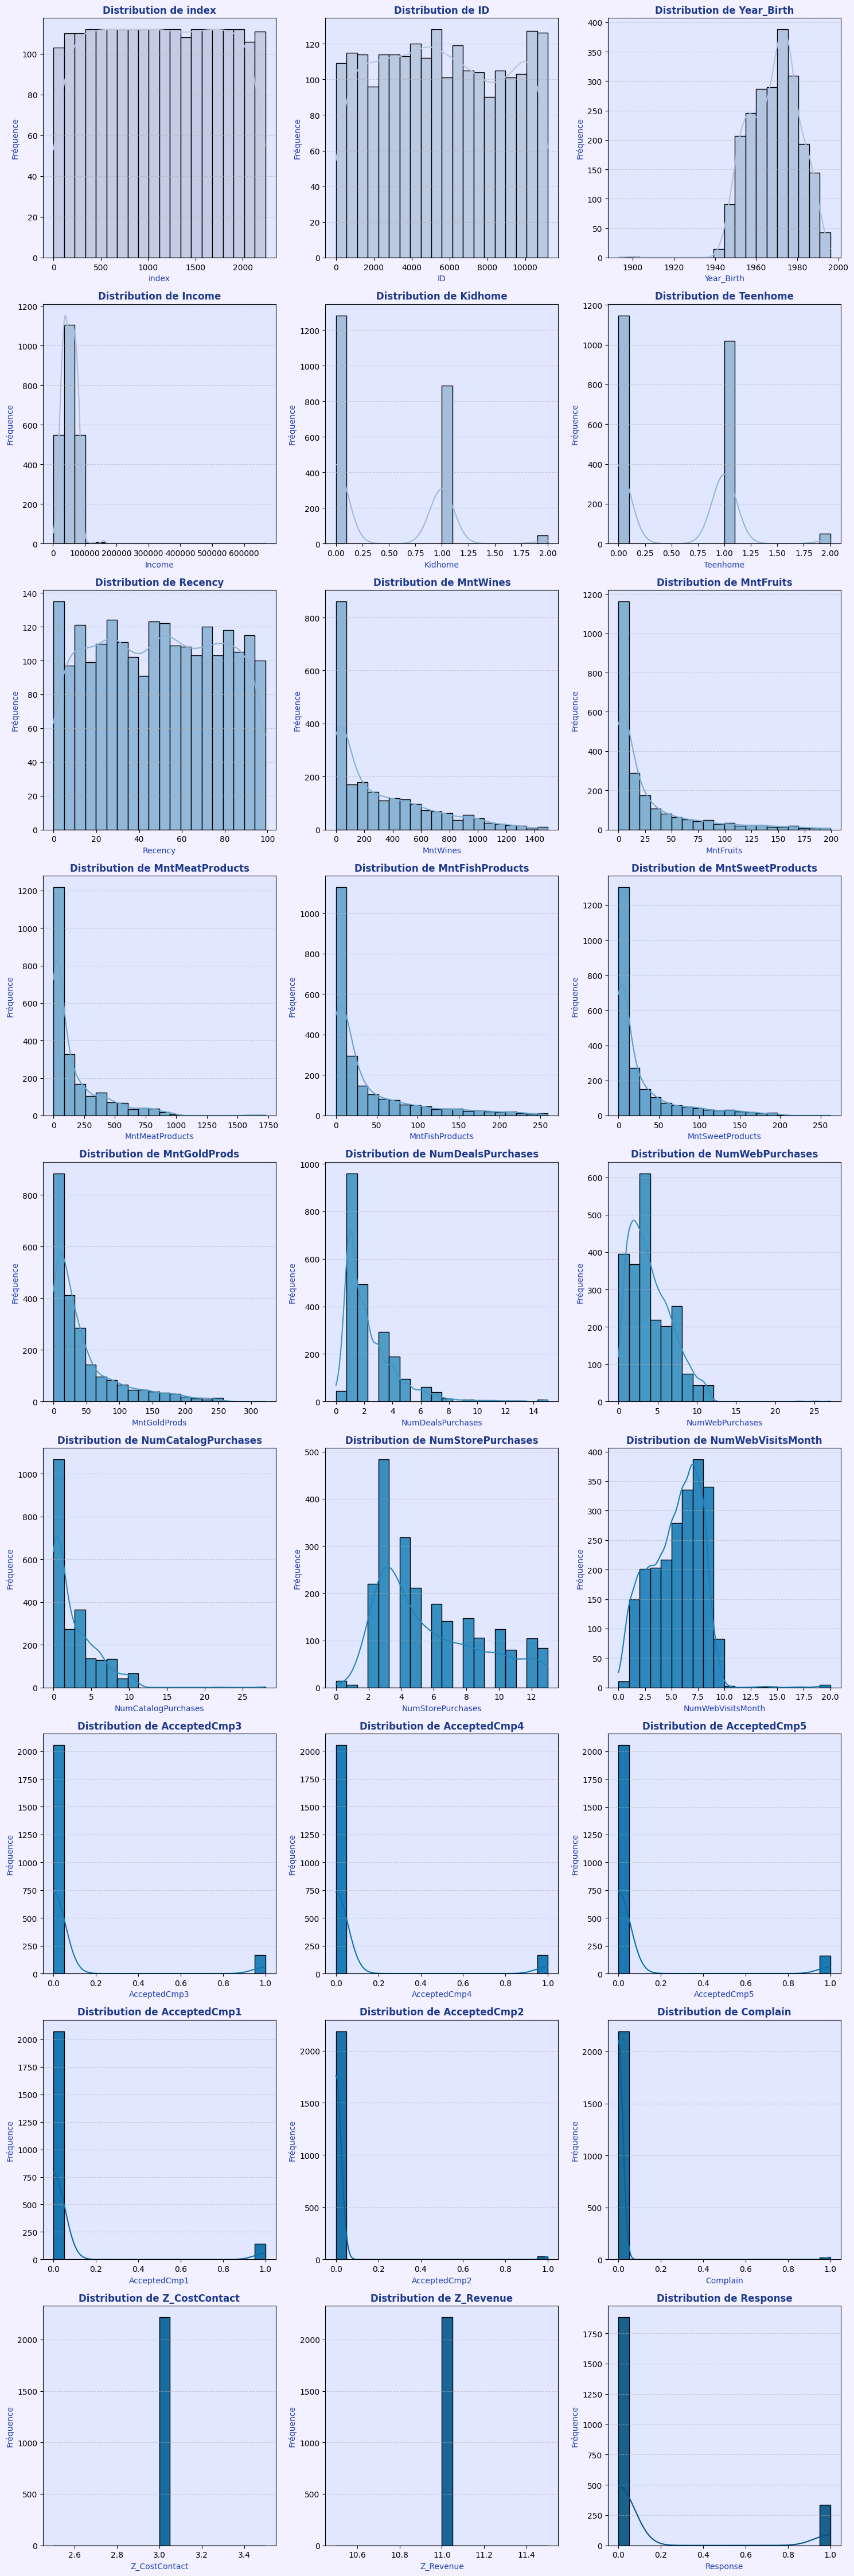

In [27]:
num_cols = data_camp_market.select_dtypes(include=['int', 'float']).columns
n = len(num_cols)
n_cols = 3
n_rows = (n + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

gradient = plt.cm.PuBu(np.linspace(0.3, 0.9, len(num_cols)))

fig.patch.set_facecolor('#F3F0FF')

for i, col in enumerate(num_cols):
    ax = axes[i]
    color = gradient[i % len(gradient)]

    sns.histplot(data_camp_market[col], bins=20, kde=True, color=color, edgecolor='black', ax=ax, alpha=0.9)

    ax.set_title(f"Distribution de {col}", fontsize=12, fontweight='bold', color='#1E3A8A')
    ax.set_xlabel(col, fontsize=10, color='#1E40AF')
    ax.set_ylabel("Fréquence", fontsize=10, color='#1E40AF')

    ax.set_facecolor('#E0E7FF')
    ax.grid(axis='y', linestyle='--', alpha=0.5)

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


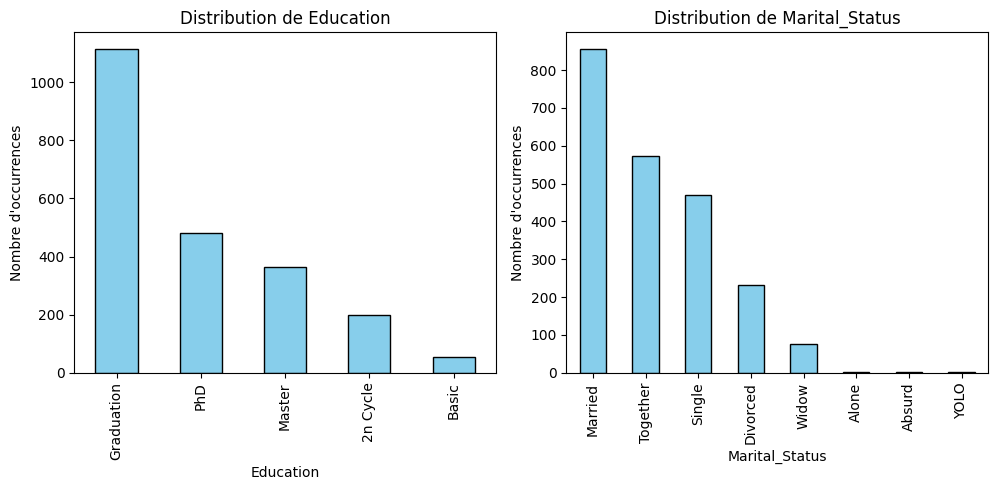

In [28]:
cat_cols = data_camp_market.select_dtypes(include=['object', 'string']).columns

n = len(cat_cols)
n_cols = 3
n_rows = (n + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    data_camp_market[col].value_counts().plot(kind='bar', ax=axes[i], color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribution de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Nombre d\'occurrences')

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

#### Boxplots

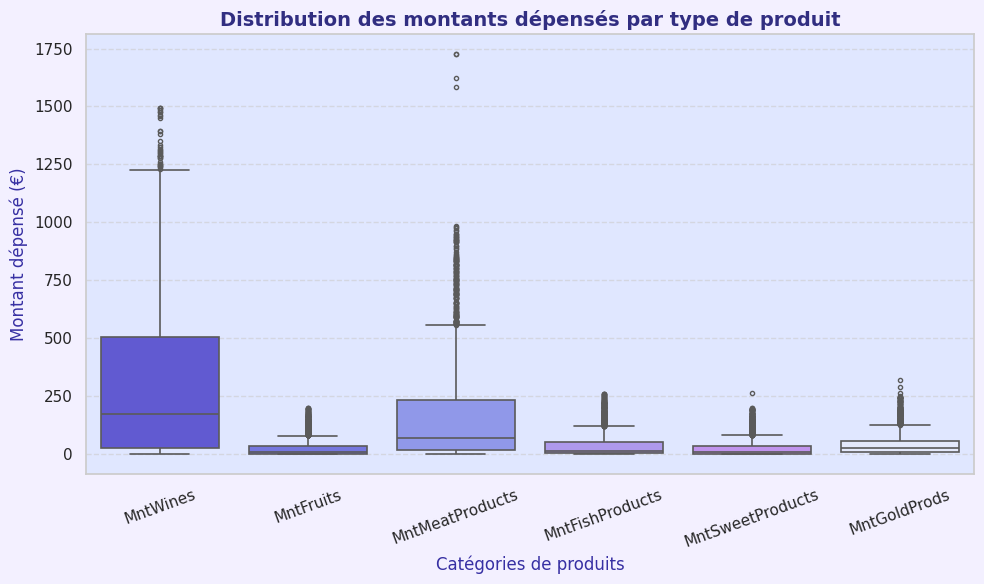

In [31]:
cols = ["MntWines", "MntFruits", "MntMeatProducts",
        "MntFishProducts", "MntSweetProducts", "MntGoldProds"]

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

palette = sns.color_palette(["#4F46E5", "#6366F1", "#818CF8", "#A78BFA", "#C084FC", "#E0E7FF"])

sns.boxplot(
    data=data_camp_market[cols],
    palette=palette,
    linewidth=1.2,
    fliersize=3
)


plt.title("Distribution des montants dépensés par type de produit",
          fontsize=14, fontweight='bold', color='#312E81')
plt.xlabel("Catégories de produits", fontsize=12, color='#3730A3')
plt.ylabel("Montant dépensé (€)", fontsize=12, color='#3730A3')
plt.xticks(rotation=20, fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.6)


fig = plt.gcf()
ax = plt.gca()
fig.patch.set_facecolor('#F3F0FF')
ax.set_facecolor('#E0E7FF')

plt.tight_layout()
plt.show()

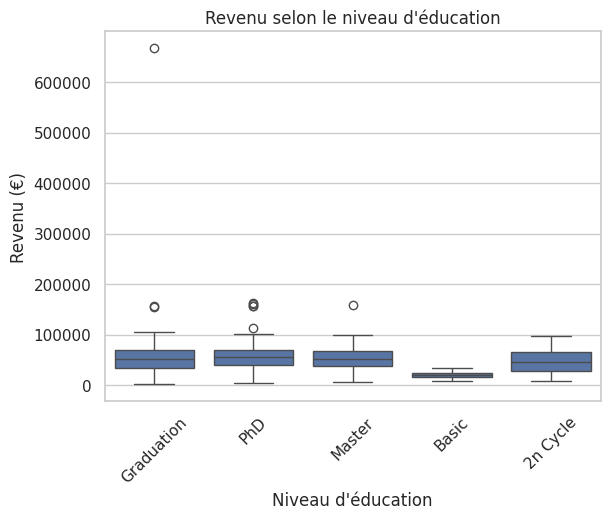

In [33]:
sns.boxplot(x="Education", y="Income", data=data_camp_market)
plt.title("Revenu selon le niveau d'éducation")
plt.xlabel("Niveau d'éducation")
plt.ylabel("Revenu (€)")
plt.xticks(rotation=45)
plt.show()


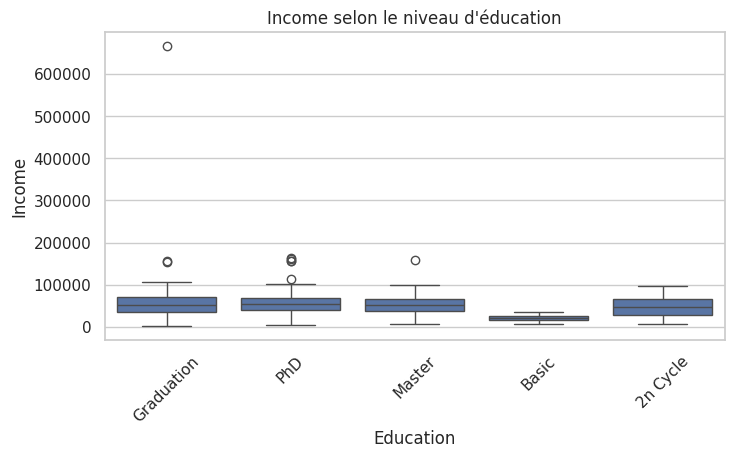

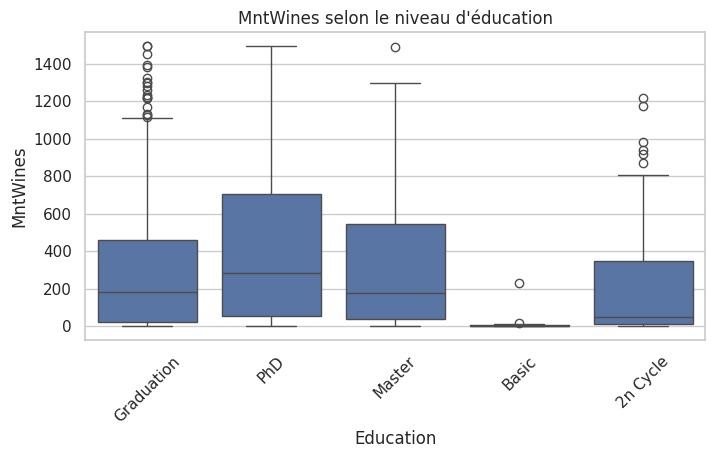

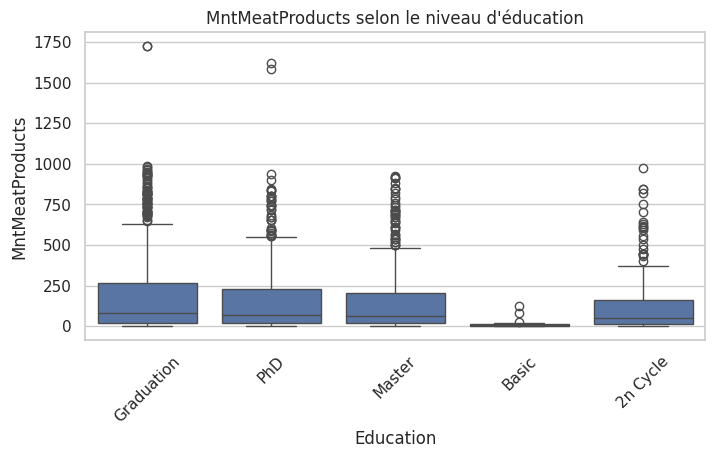

In [32]:
num_cols = ["Income", "MntWines", "MntMeatProducts"]

for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x="Education", y=col, data=data_camp_market)
    plt.title(f"{col} selon le niveau d'éducation")
    plt.xticks(rotation=45)
    plt.show()


#### Scatter plot

<Axes: xlabel='Year_Birth', ylabel='Income'>

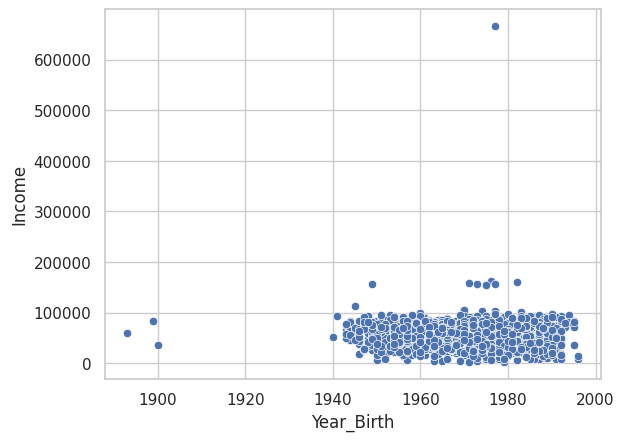

In [35]:
sns.scatterplot(x="Year_Birth", y="Income", data=data_camp_market)

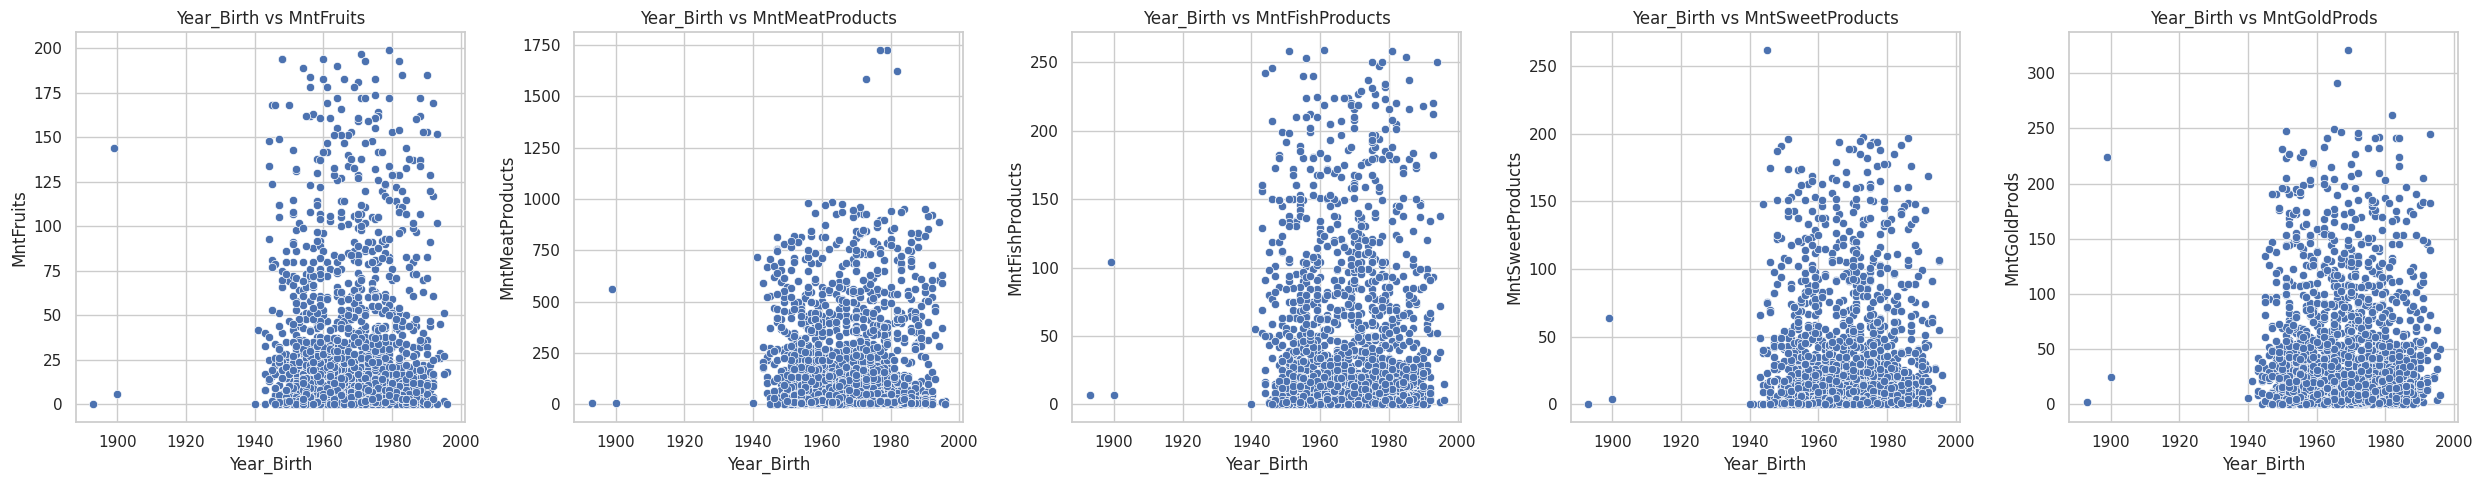

In [34]:
y_vars = ["MntFruits", "MntMeatProducts", "MntFishProducts",
          "MntSweetProducts", "MntGoldProds"]

fig, axes = plt.subplots(nrows=1, ncols=len(y_vars), figsize=(25, 5))

for i, y in enumerate(y_vars):
    sns.scatterplot(x="Year_Birth", y=y, data=data_camp_market, ax=axes[i])
    axes[i].set_title(f"Year_Birth vs {y}")

plt.tight_layout()
plt.show()

In [ ]:
y_vars = ["MntFruits", "MntMeatProducts", "MntFishProducts",
          "MntSweetProducts", "MntGoldProds"]

fig, axes = plt.subplots(nrows=1, ncols=len(y_vars), figsize=(25, 5))

for i, y in enumerate(y_vars):
    sns.scatterplot(x="Income", y=y, data=data_camp_market, ax=axes[i])
    axes[i].set_title(f"Income vs {y}")

plt.tight_layout()
plt.show()

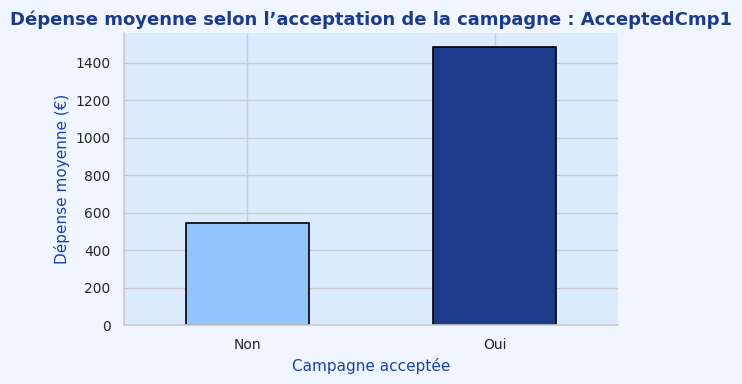

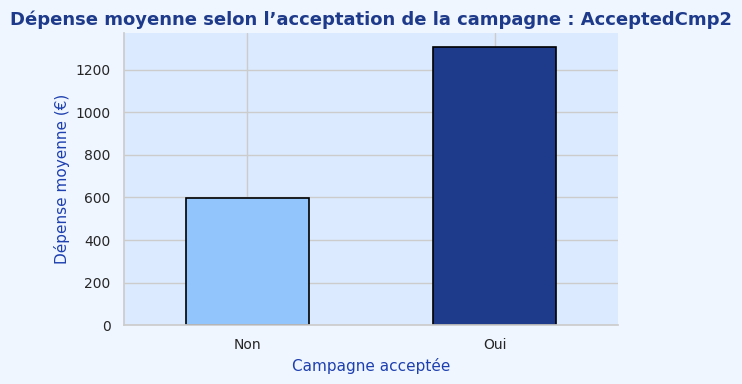

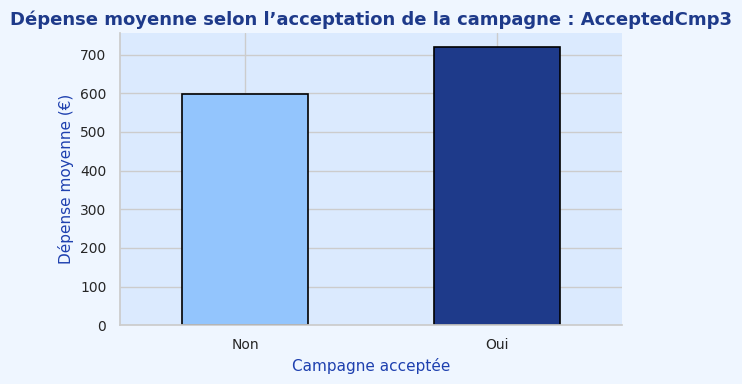

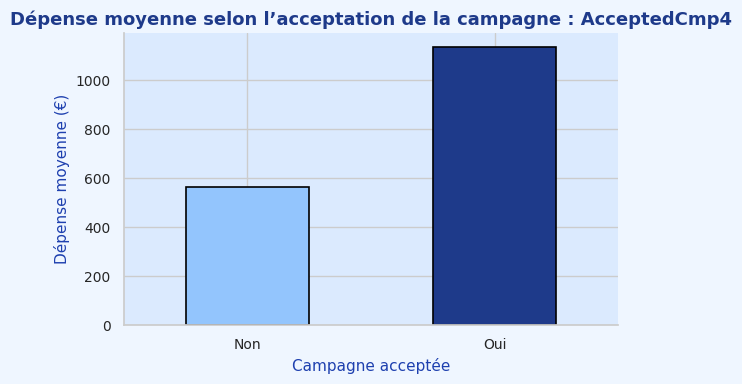

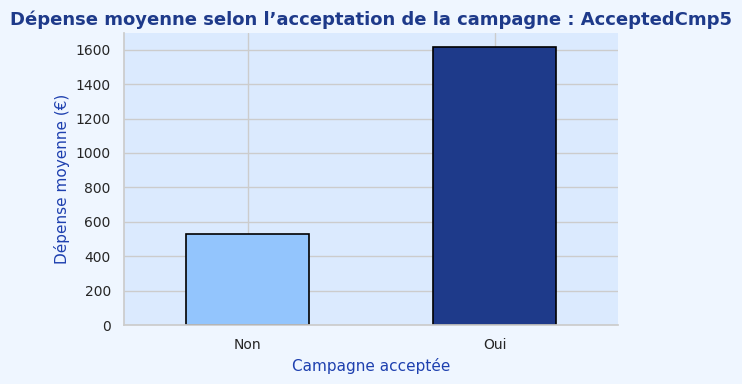

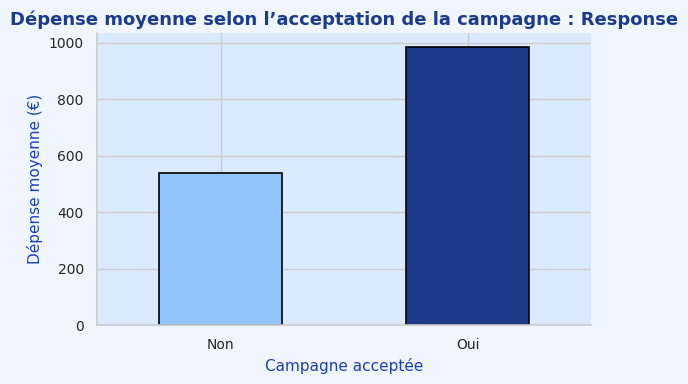

In [38]:
# Calculate the total amount spent by each customer
data_camp_market['TotalSpent'] = data_camp_market['MntWines'] + data_camp_market['MntFruits'] + data_camp_market['MntMeatProducts'] + data_camp_market['MntFishProducts'] + data_camp_market['MntSweetProducts'] + data_camp_market['MntGoldProds']

campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
campaign_spending = {}

for col in campaign_cols:
    campaign_spending[col] = data_camp_market.groupby(col)['TotalSpent'].mean()

blue_gradient = ['#93C5FD', '#1E3A8A']
background_color = '#EFF6FF'
chart_color = '#DBEAFE'

for campaign, spending in campaign_spending.items():
    plt.figure(figsize=(6, 4))

    spending.plot(
        kind='bar',
        color=blue_gradient,
        edgecolor='black',
        linewidth=1.2
    )

    plt.title(f"Dépense moyenne selon l’acceptation de la campagne : {campaign}",
              fontsize=13, fontweight='bold', color='#1E3A8A')
    plt.xlabel("Campagne acceptée", fontsize=11, color='#1E40AF')
    plt.ylabel("Dépense moyenne (€)", fontsize=11, color='#1E40AF')
    plt.xticks(ticks=[0, 1], labels=['Non', 'Oui'], rotation=0, fontsize=10)
    plt.yticks(fontsize=10)

    fig = plt.gcf()
    ax = plt.gca()
    fig.patch.set_facecolor(background_color)
    ax.set_facecolor(chart_color)

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    plt.tight_layout()
    plt.show()

In [40]:
data_camp_market.rename(columns={'MntGoldProds': 'MntGoldProducts'}, inplace=True)
data_camp_market['TotalMntSpent'] = data_camp_market['MntWines'] + data_camp_market['MntFruits'] + data_camp_market['MntMeatProducts'] + data_camp_market['MntFishProducts'] + data_camp_market['MntSweetProducts'] + data_camp_market['MntGoldProducts']
data_camp_market['Total_Acc_Cmp'] = data_camp_market['AcceptedCmp1'] + data_camp_market['AcceptedCmp2'] + data_camp_market['AcceptedCmp3'] + data_camp_market['AcceptedCmp4'] + data_camp_market['AcceptedCmp5'] + data_camp_market['Response']
avg_spending_by_total_campaigns = data_camp_market.groupby('Total_Acc_Cmp')['TotalMntSpent'].mean()
print("Dépense moyenne selon le nombre total de campagnes acceptées")
print(avg_spending_by_total_campaigns)

Dépense moyenne selon le nombre total de campagnes acceptées
Total_Acc_Cmp
0     460.194289
1     827.796748
2    1059.201439
3    1486.921569
4    1673.527778
5    1514.000000
Name: TotalMntSpent, dtype: float64


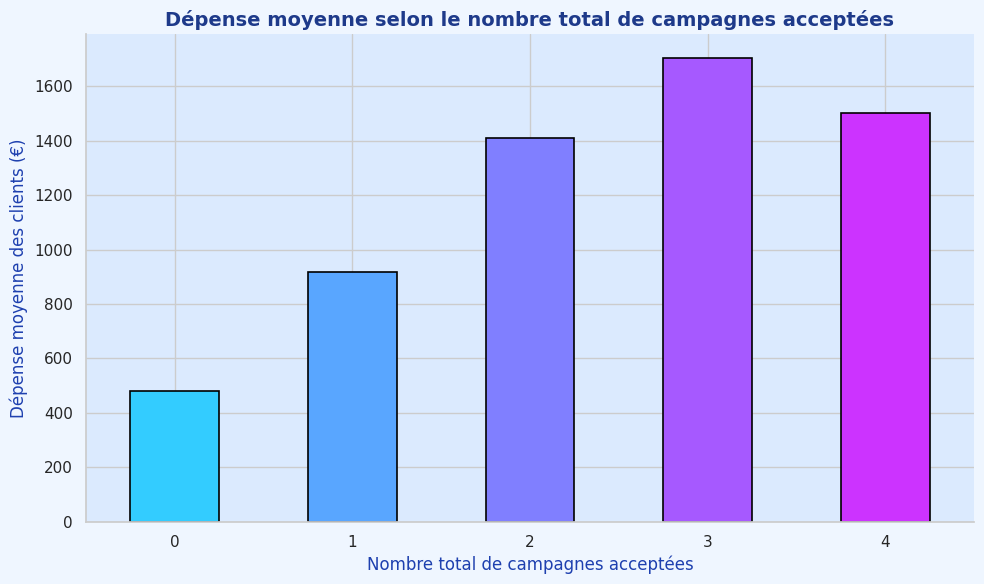

In [44]:
data_camp_market.rename(columns={'MntGoldProds': 'MntGoldProducts'}, inplace=True)
data_camp_market['TotalSpent'] = data_camp_market['MntWines'] + data_camp_market['MntFruits'] + data_camp_market['MntMeatProducts'] + data_camp_market['MntFishProducts'] + data_camp_market['MntSweetProducts'] + data_camp_market['MntGoldProducts']
data_camp_market['TotalAcceptedCmp'] = data_camp_market[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']].sum(axis=1)

# Calcul de la dépense moyenne par nombre total de campagnes acceptées
avg_spending_by_total_campaigns = data_camp_market.groupby('TotalAcceptedCmp')['TotalSpent'].mean()

plt.figure(figsize=(10, 6))

colors = plt.cm.cool(np.linspace(0.2, 0.8, len(avg_spending_by_total_campaigns)))

avg_spending_by_total_campaigns.plot(
    kind='bar',
    color=colors,
    edgecolor='black',
    linewidth=1.2
)

plt.title("Dépense moyenne selon le nombre total de campagnes acceptées",
          fontsize=14, fontweight='bold', color='#1E3A8A')
plt.xlabel("Nombre total de campagnes acceptées", fontsize=12, color='#1E40AF')
plt.ylabel("Dépense moyenne des clients (€)", fontsize=12, color='#1E40AF')
plt.xticks(rotation=0, fontsize=11)
plt.yticks(fontsize=11)

fig = plt.gcf()
ax = plt.gca()
fig.patch.set_facecolor('#EFF6FF')
ax.set_facecolor('#DBEAFE')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()

plt.show()

### Retrait des outliers

In [45]:
outliers_annee_naissance = data_camp_market[data_camp_market["Year_Birth"] < 1920]
outliers_salaire_annuel = data_camp_market[data_camp_market["Income"] > 300000]

print(outliers_annee_naissance)
print(outliers_salaire_annuel)

data_camp_market = data_camp_market[data_camp_market["Year_Birth"] >= 1920]
data_camp_market = data_camp_market[data_camp_market["Income"] <= 300000]

     index     ID  Year_Birth Education Marital_Status   Income  Kidhome  \
181    192   7829        1900  2n Cycle       Divorced  36640.0        1   
228    239  11004        1893  2n Cycle         Single  60182.0        0   
326    339   1150        1899       PhD       Together  83532.0        0   

     Teenhome Dt_Customer  Recency  ...  AcceptedCmp1  AcceptedCmp2  Complain  \
181         0         NaT       99  ...             0             0         1   
228         1         NaT       23  ...             0             0         0   
326         0         NaT       36  ...             0             0         0   

     Z_CostContact  Z_Revenue  Response  TotalSpent  TotalMntSpent  \
181              3         11         0          65             65   
228              3         11         0          22             22   
326              3         11         0        1853           1853   

     Total_Acc_Cmp  TotalAcceptedCmp  
181              0                 0  
228        

### Graphiques sans outliers

#### Scatterplots

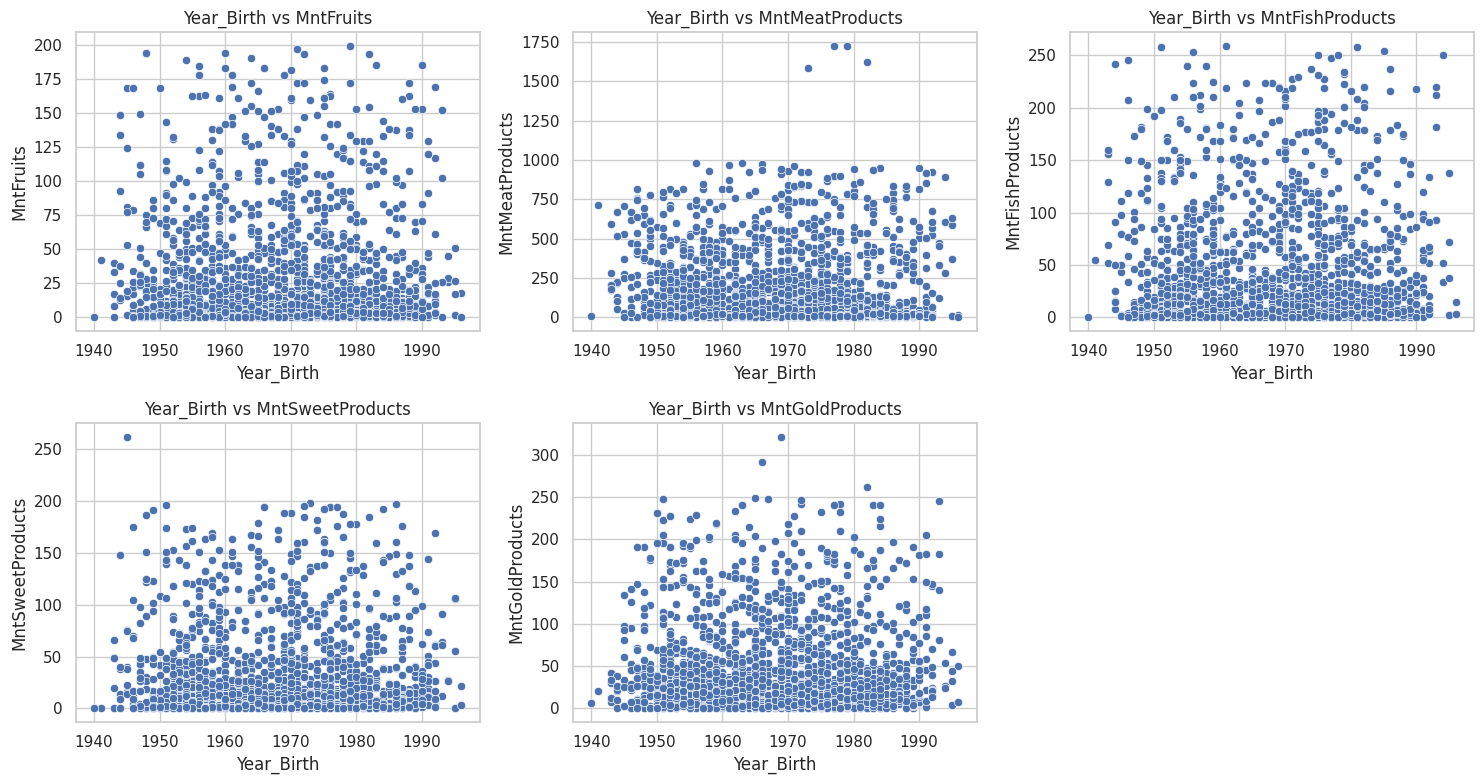

In [47]:
y_vars = ["MntFruits", "MntMeatProducts", "MntFishProducts",
          "MntSweetProducts", "MntGoldProducts"]

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for i, y in enumerate(y_vars):
    sns.scatterplot(x="Year_Birth", y=y, data=data_camp_market, ax=axes[i])
    axes[i].set_title(f"Year_Birth vs {y}")

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

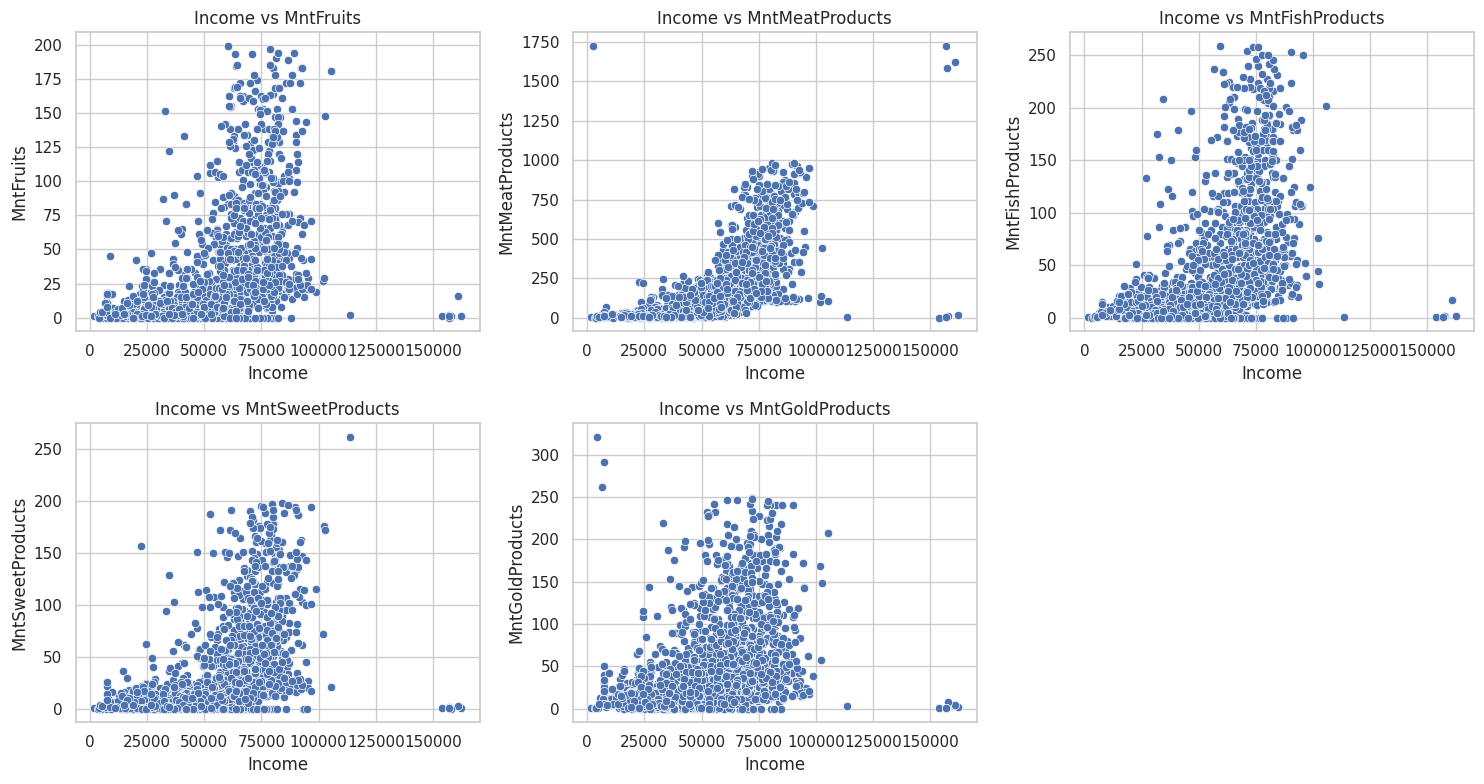

In [49]:
y_vars = ["MntFruits", "MntMeatProducts", "MntFishProducts",
          "MntSweetProducts", "MntGoldProducts"]

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for i, y in enumerate(y_vars):
    sns.scatterplot(x="Income", y=y, data=data_camp_market, ax=axes[i])
    axes[i].set_title(f"Income vs {y}")

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

#### Heatmap corrélation

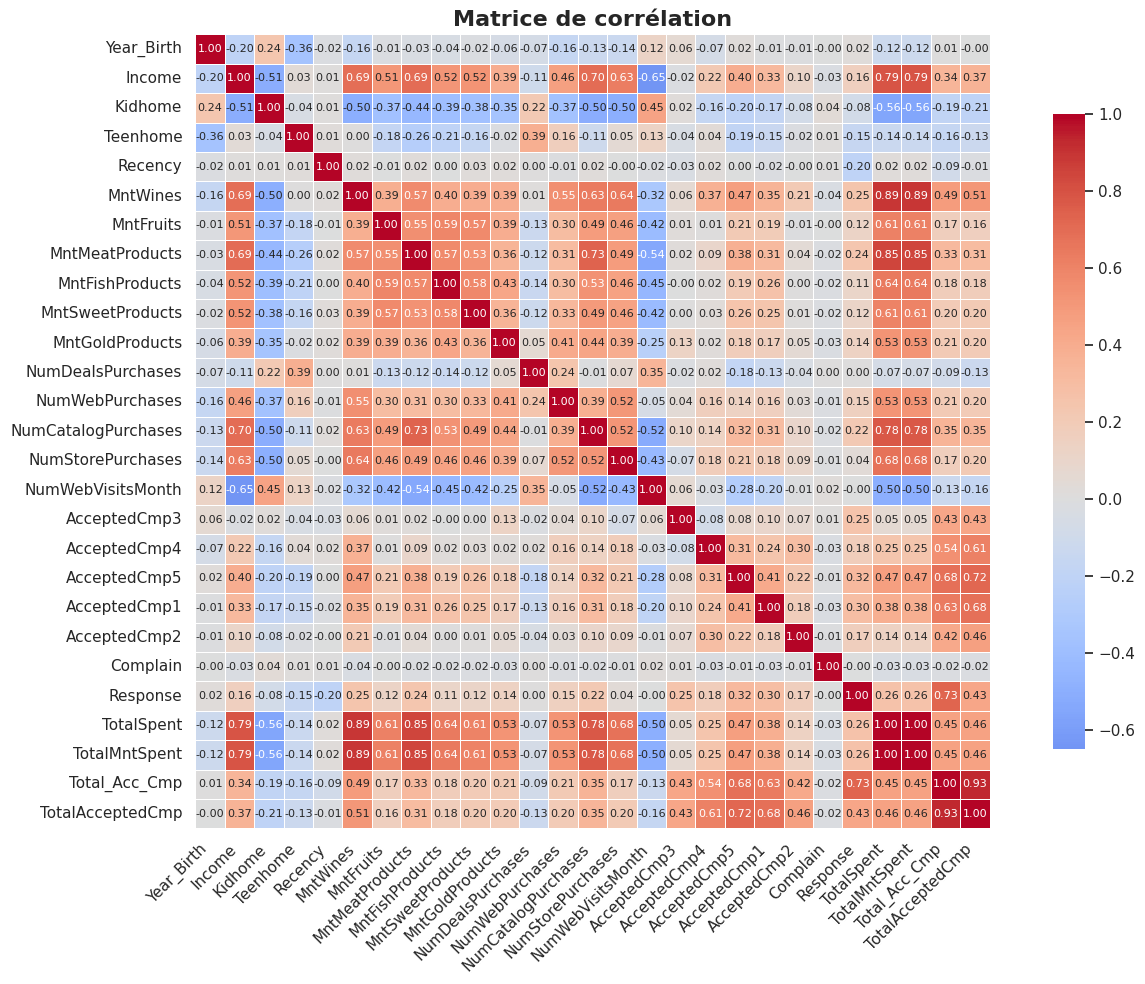

In [50]:
# Supprimer les colonnes avant la corrélation
data_filtered = data_camp_market.drop(columns=["index", "ID", "Z_CostContact", "Z_Revenue"])

# Calcul de la matrice de corrélation
corr_matrix = data_filtered.corr(numeric_only=True)

# Affichage de la heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    annot_kws={"size": 8}
)
plt.title("Matrice de corrélation", fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Feature Engineering

In [52]:
df = data_camp_market.copy()

# 1) Âge (année courante pour rester robuste)
df["Age"] = 2014 - df["Year_Birth"]

# 2) Nombre total d’enfants
df["Children"] = df["Kidhome"] + df["Teenhome"]

# 3) Ancienneté client (en années, depuis aujourd’hui)
# NOTE: Dt_Customer has many NaNs after datetime conversion,
# this will result in many NaNs in Customer_Since_Years.
today = pd.Timestamp.today().normalize()
df["Customer_Since_Years"] = (today - df["Dt_Customer"]).dt.days / 365.25

# 4) Dépense totale
spend_cols = ["MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProducts"]
df["Total_Spent"] = df[spend_cols].sum(axis=1)

# 5) Canal préféré (web / catalogue / magasin) selon le max des achats
channel_cols = ["NumWebPurchases","NumCatalogPurchases","NumStorePurchases"]
preferred_idx = df[channel_cols].idxmax(axis=1)
df["Preferred_Channel"] = preferred_idx.map({
    "NumWebPurchases": "web",
    "NumCatalogPurchases": "catalog",
    "NumStorePurchases": "store"
})

# 6) Nombre de campagnes acceptées
cmp_cols = ["AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5"]
df["Campaign_Accepted"] = df[cmp_cols].sum(axis=1)

# 7) Taux de conversion web : achats web / visites web (évite /0)
df["Web_Conversion_Rate"] = df["NumWebPurchases"] / df["NumWebVisitsMonth"].replace(0, np.nan)
df["Web_Conversion_Rate"] = df["Web_Conversion_Rate"].fillna(0)


new_cols = ["Age","Children","Customer_Since_Years","Total_Spent","Preferred_Channel","Campaign_Accepted","Web_Conversion_Rate"]
display(df[new_cols].head())

Age  Children  Customer_Since_Years  Total_Spent Preferred_Channel  \
0   57         0             13.541410         1617           catalog   
1   60         2             11.225188           27             store   
2   49         0                   NaN          776             store   
3   30         1             11.060917           53             store   
4   33         1                   NaN          422             store   

   Campaign_Accepted  Web_Conversion_Rate  
0                  0             1.142857  
1                  0             0.200000  
2                  0             2.000000  
3                  0             0.333333  
4                  0             1.000000

## Analyse efficacité des campagnes marketing

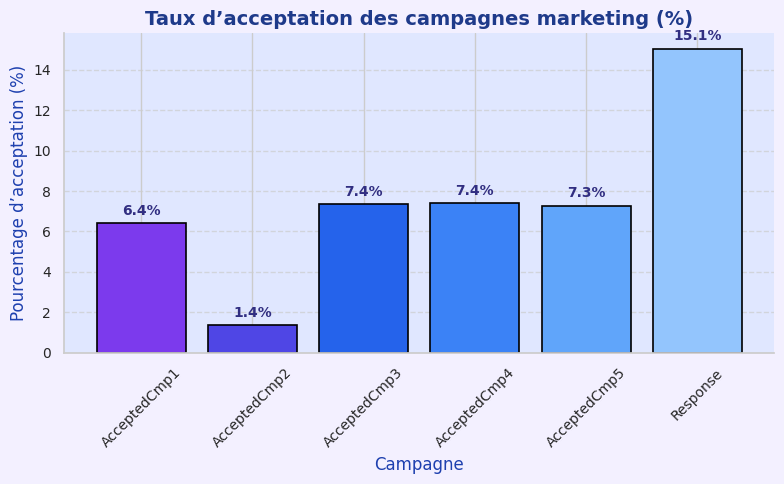

In [53]:
# Colonnes des campagnes
cols = ["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response"]

# Calcul les taux d’acceptation
acceptation_rates = df[cols].mean() * 100

colors = ['#7C3AED', '#4F46E5', '#2563EB', '#3B82F6', '#60A5FA', '#93C5FD']

plt.figure(figsize=(8,5))
plt.bar(acceptation_rates.index, acceptation_rates.values, color=colors, edgecolor='black', linewidth=1.2)

plt.title("Taux d’acceptation des campagnes marketing (%)", fontsize=14, fontweight='bold', color='#1E3A8A')
plt.ylabel("Pourcentage d’acceptation (%)", fontsize=12, color='#1E40AF')
plt.xlabel("Campagne", fontsize=12, color='#1E40AF')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

fig = plt.gcf()
ax = plt.gca()
fig.patch.set_facecolor('#F3F0FF')
ax.set_facecolor('#E0E7FF')


for i, v in enumerate(acceptation_rates.values):
    plt.text(i, v + 0.4, f"{v:.1f}%", ha='center', fontsize=10, fontweight='bold', color='#312E81')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()
plt.show()

/tmp/ipython-input-2633762776.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Achats_moyens.index, y=Achats_moyens.values, palette=violet_blue_palette)


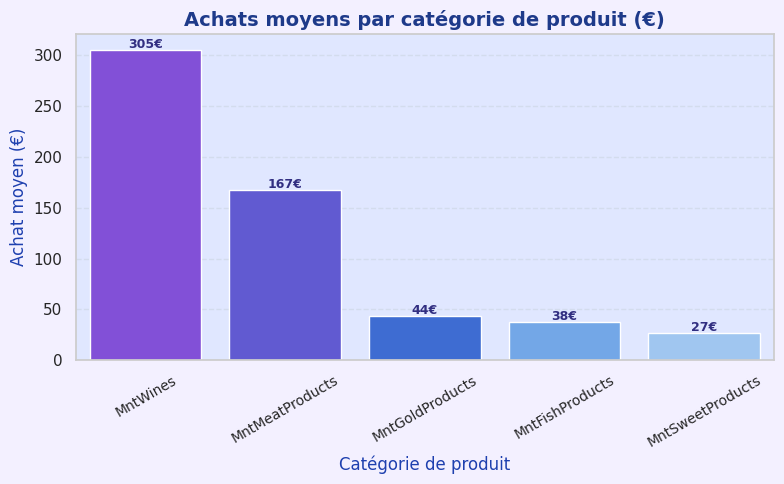

/tmp/ipython-input-2633762776.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Response', y='Income', data=df, palette=['#60A5FA', '#7C3AED'])


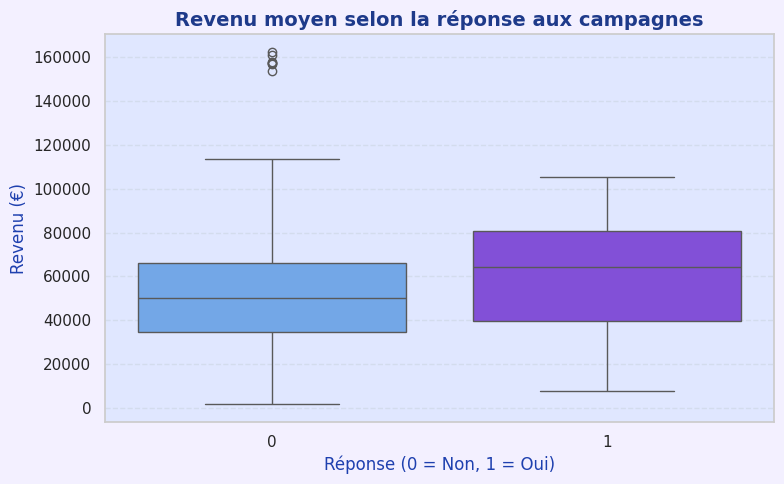

/tmp/ipython-input-2633762776.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


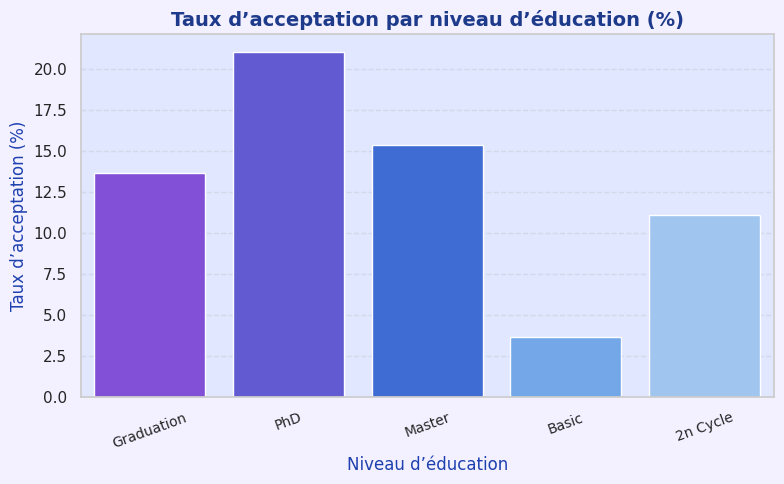

In [54]:

# Rename column to ensure consistency
df.rename(columns = {'MntGoldProds':'MntGoldProducts'}, inplace = True)

sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.facecolor'] = '#E0E7FF'   # bleu clair
plt.rcParams['figure.facecolor'] = '#F3F0FF' # fond global violet très clair
plt.rcParams['grid.color'] = '#CBD5E1'
plt.rcParams['grid.alpha'] = 0.6

violet_blue_palette = ['#7C3AED', '#4F46E5', '#2563EB', '#60A5FA', '#93C5FD']  # violet → bleu ciel


mnt_cols = ['MntWines', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProducts']
Achats_moyens = df[mnt_cols].mean().sort_values(ascending=False)

plt.figure()
sns.barplot(x=Achats_moyens.index, y=Achats_moyens.values, palette=violet_blue_palette)
plt.title("Achats moyens par catégorie de produit (€)", color='#1E3A8A')
plt.ylabel("Achat moyen (€)", color='#1E40AF')
plt.xlabel("Catégorie de produit", color='#1E40AF')
plt.xticks(rotation=30, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)

for i, v in enumerate(Achats_moyens.values):
    plt.text(i, v + 2, f"{v:.0f}€", ha='center', fontsize=9, fontweight='bold', color='#312E81')

plt.tight_layout()
plt.show()
legend=False
# Revenu moyen selon la réponse aux campagnes

plt.figure()
sns.boxplot(x='Response', y='Income', data=df, palette=['#60A5FA', '#7C3AED'])
plt.title("Revenu moyen selon la réponse aux campagnes", color='#1E3A8A')
plt.xlabel("Réponse (0 = Non, 1 = Oui)", color='#1E40AF')
plt.ylabel("Revenu (€)", color='#1E40AF')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Taux d’acceptation par niveau d’éducation

plt.figure()
sns.barplot(
    x='Education',
    y='Response',
    data=df,
    estimator=lambda x: 100 * x.mean(),
    palette=violet_blue_palette,
    errorbar=None
)
plt.title("Taux d’acceptation par niveau d’éducation (%)", color='#1E3A8A')
plt.ylabel("Taux d’acceptation (%)", color='#1E40AF')
plt.xlabel("Niveau d’éducation", color='#1E40AF')
plt.xticks(rotation=20, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


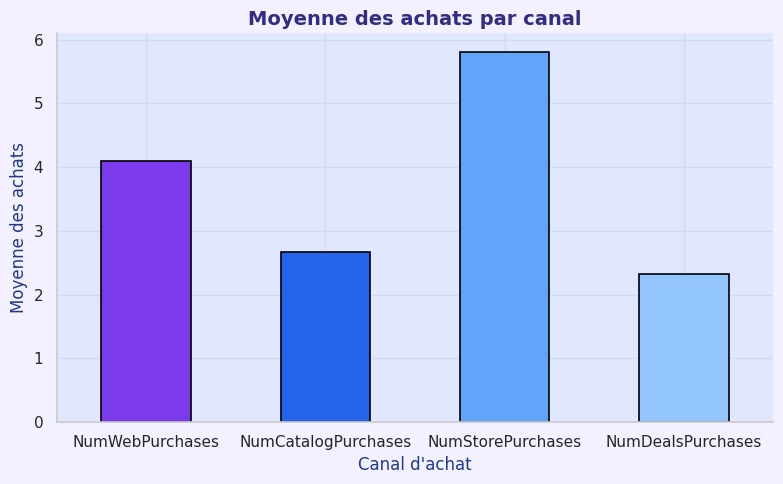

In [55]:
# Calcul de la moyenne des achats par canal
avg_channels = df[['NumWebPurchases','NumCatalogPurchases','NumStorePurchases', 'NumDealsPurchases']].mean()

colors = ['#7C3AED', '#2563EB', '#60A5FA', '#93C5FD']  # violet, bleu foncé, bleu moyen, bleu ciel

plt.figure(figsize=(8, 5))
avg_channels.plot(
    kind='bar',
    color=colors,
    edgecolor='black',
    linewidth=1.2
)

plt.title("Moyenne des achats par canal", fontsize=14, fontweight='bold', color='#312E81')
plt.xlabel("Canal d'achat", fontsize=12, color='#1E3A8A')
plt.ylabel("Moyenne des achats", fontsize=12, color='#1E3A8A')
plt.xticks(rotation=0, fontsize=11)
plt.yticks(fontsize=11)

fig = plt.gcf()
ax = plt.gca()
fig.patch.set_facecolor('#F3F0FF')
ax.set_facecolor('#E0E7FF')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()
plt.show()

In [57]:

data_camp_market = pd.read_csv('/content/Camp_Market (1).csv', sep=';')

data_camp_market.rename(columns={'MntGoldProds': 'MntGoldProducts'}, inplace=True)
data_camp_market['TotalMntSpent'] = data_camp_market['MntWines'] + data_camp_market['MntFruits'] + data_camp_market['MntMeatProducts'] + data_camp_market['MntFishProducts'] + data_camp_market['MntSweetProducts'] + data_camp_market['MntGoldProducts']

campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
campaign_spending = {}

for col in campaign_cols:
    campaign_spending[col] = df.groupby(col)['TotalMntSpent'].mean()

for campaign, spending in campaign_spending.items():
    print(f"Dépense moyenne pour {campaign}:")
    print(spending)
    print("-" * 30)

Dépense moyenne pour AcceptedCmp1:
AcceptedCmp1
0     547.101449
1    1484.345070
Name: TotalMntSpent, dtype: float64
------------------------------
Dépense moyenne pour AcceptedCmp2:
AcceptedCmp2
0     597.638405
1    1307.666667
Name: TotalMntSpent, dtype: float64
------------------------------
Dépense moyenne pour AcceptedCmp3:
AcceptedCmp3
0    598.257199
1    720.539877
Name: TotalMntSpent, dtype: float64
------------------------------
Dépense moyenne pour AcceptedCmp4:
AcceptedCmp4
0     564.803223
1    1137.560976
Name: TotalMntSpent, dtype: float64
------------------------------
Dépense moyenne pour AcceptedCmp5:
AcceptedCmp5
0     528.165773
1    1614.962733
Name: TotalMntSpent, dtype: float64
------------------------------
Dépense moyenne pour Response:
Response
0    540.208622
1    985.660661
Name: TotalMntSpent, dtype: float64
------------------------------


/tmp/ipython-input-4165937896.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Achats_moyens.index, y=Achats_moyens.values, palette=flash_palette)
/tmp/ipython-input-4165937896.py:17: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.barplot(x=Achats_moyens.index, y=Achats_moyens.values, palette=flash_palette)


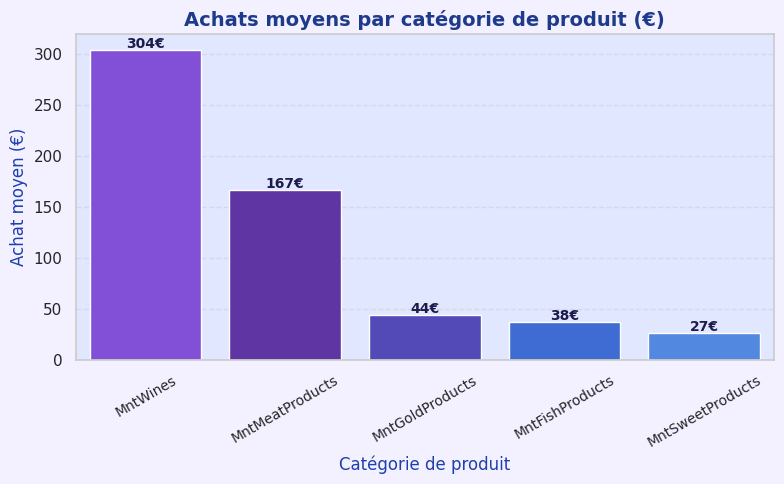

/tmp/ipython-input-4165937896.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Response', y='Income', data=data_camp_market, palette=['#6366F1', '#7C3AED'])


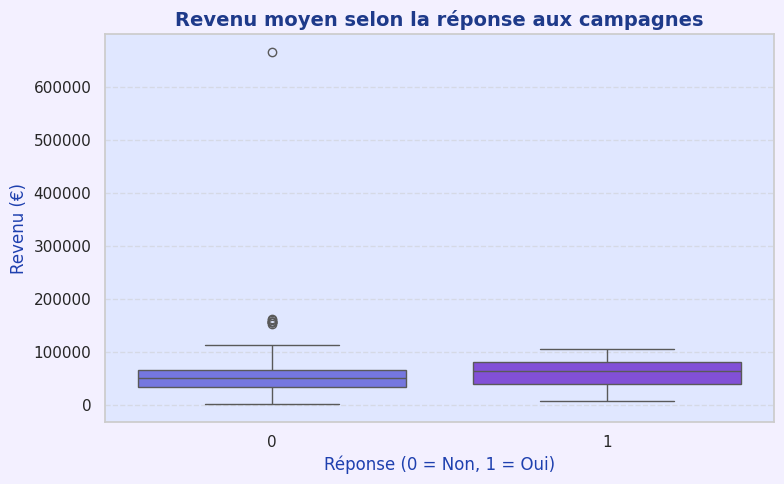

/tmp/ipython-input-4165937896.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-4165937896.py:45: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.barplot(


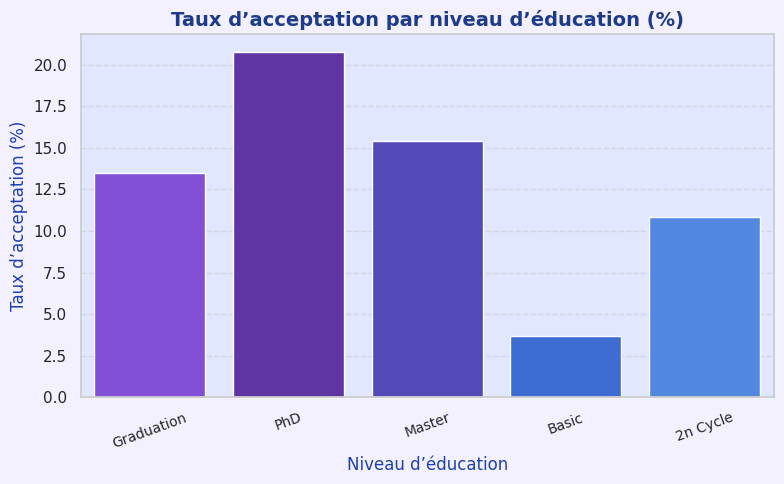

In [58]:
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.facecolor'] = '#E0E7FF'
plt.rcParams['figure.facecolor'] = '#F3F0FF'

flash_palette = ['#7C3AED', '#5B21B6', '#4338CA', '#2563EB', '#3B82F6', '#60A5FA']

data_camp_market.rename(columns={'MntGoldProds': 'MntGoldProducts'}, inplace=True)

# Achats moyens par catégorie de produit
mnt_cols = ['MntWines', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProducts']
Achats_moyens = data_camp_market[mnt_cols].mean().sort_values(ascending=False)

plt.figure()
sns.barplot(x=Achats_moyens.index, y=Achats_moyens.values, palette=flash_palette)
plt.title("Achats moyens par catégorie de produit (€)", color='#1E3A8A')
plt.ylabel("Achat moyen (€)", color='#1E40AF')
plt.xlabel("Catégorie de produit", fontsize=12, color='#1E40AF')
plt.xticks(rotation=30, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Valeurs au-dessus des barres
for i, v in enumerate(Achats_moyens.values):
    plt.text(i, v + 2, f"{v:.0f}€", ha='center', fontsize=10, fontweight='bold', color='#1E1B4B')

plt.tight_layout()
plt.show()

# Revenu moyen selon la réponse aux campagnes

plt.figure()
sns.boxplot(x='Response', y='Income', data=data_camp_market, palette=['#6366F1', '#7C3AED'])
plt.title("Revenu moyen selon la réponse aux campagnes", color='#1E3A8A')
plt.xlabel("Réponse (0 = Non, 1 = Oui)", color='#1E40AF')
plt.ylabel("Revenu (€)", color='#1E40AF')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Taux d’acceptation par niveau d’éducation

plt.figure()
sns.barplot(
    x='Education',
    y='Response',
    data=data_camp_market,
    estimator=lambda x: 100 * x.mean(),
    palette=flash_palette,
    errorbar=None
)
plt.title("Taux d’acceptation par niveau d’éducation (%)", color='#1E3A8A')
plt.ylabel("Taux d’acceptation (%)", color='#1E40AF')
plt.xlabel("Niveau d’éducation", color='#1E40AF')
plt.xticks(rotation=20, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## ACP - Analyse en Composantes Principales

In [60]:
data_camp_market = data_camp_market.copy()
num_vars = ["Income","Recency","MntWines","MntMeatProducts","MntFishProducts","MntFruits","MntSweetProducts","MntGoldProducts"]
cat_vars = []
id_col  = "ID"
n_components = None

cols = (num_vars or []) + (cat_vars or [])
work = df[cols].copy()
work = work.dropna()
ct = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(with_mean=True, with_std=True), num_vars),
        ("cat", OneHotEncoder(drop="if_binary", handle_unknown="ignore"), cat_vars)
    ],
    remainder="drop"
)

pca = PCA(n_components=n_components, random_state=42)

pipe = Pipeline(steps=[
    ("prep", ct),
    ("pca", pca)
])

X_pca = pipe.fit_transform(work)

explained = pipe.named_steps["pca"].explained_variance_ratio_
cumexp = np.cumsum(explained)

k = int(np.argmax(cumexp >= 0.85) + 1) if explained.size > 0 else 2

if k != pipe.named_steps["pca"].n_components_:
    pca = PCA(n_components=k, random_state=42)
    pipe = Pipeline(steps=[("prep", ct), ("pca", pca)])
    X_pca = pipe.fit_transform(work)
    explained = pipe.named_steps["pca"].explained_variance_ratio_
    cumexp = np.cumsum(explained)

feat_names_num = num_vars
feat_names_cat = []
if cat_vars:
    ohe = pipe.named_steps["prep"].named_transformers_["cat"]
    feat_names_cat = list(ohe.get_feature_names_out(cat_vars))
feat_names = feat_names_num + feat_names_cat

components = pipe.named_steps["pca"].components_
explained_var = pipe.named_steps["pca"].explained_variance_
loadings = components.T * np.sqrt(explained_var)

loadings_df = pd.DataFrame(loadings, index=feat_names,
                           columns=[f"PC{i+1}" for i in range(loadings.shape[1])])


scores = pd.DataFrame(X_pca, index=work.index,
                      columns=[f"PC{i+1}" for i in range(X_pca.shape[1])])


df_scores = scores.copy()
if id_col and id_col in df.columns:
    df_scores[id_col] = df.loc[work.index, id_col].values

In [61]:
from sklearn.preprocessing import StandardScaler

numeric_cols = data_camp_market.select_dtypes(include=['int64', 'float64']).columns
X = data_camp_market[numeric_cols].drop(columns=['ID'], errors='ignore')

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [63]:
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_scaled_imputed = imputer.fit_transform(X_scaled)


pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled_imputed)

explained = pca.explained_variance_ratio_
cumexp = explained.cumsum()
scores = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])])

loadings_df = pd.DataFrame(pca.components_.T, index=X.columns, columns=[f"PC{i+1}" for i in range(pca.n_components_)])

In [67]:
cluster_summary = data_camp_market.groupby('Cluster_KMeans')[['Age','Income','TotalSpent','TotalAcceptedCmp','Response']].mean().round(1)
print(cluster_summary)

KeyError: 'Cluster_KMeans'

## K-means

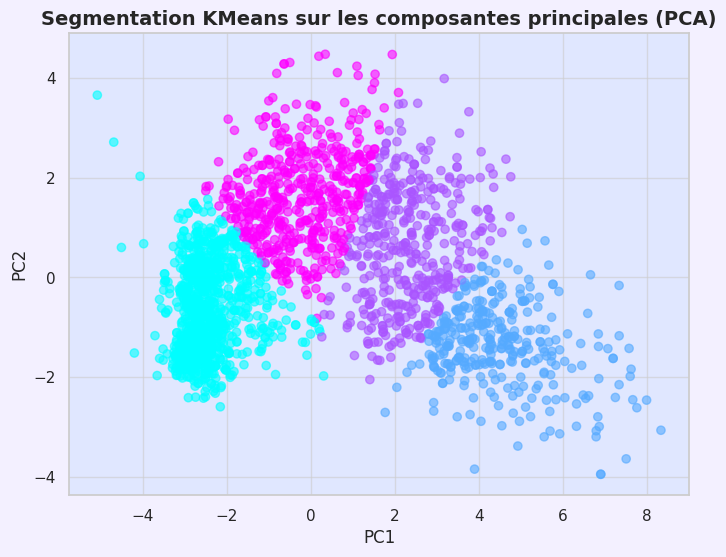

In [72]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
data_camp_market['Cluster_KMeans'] = kmeans.fit_predict(scores[['PC1', 'PC2']])

plt.figure(figsize=(8,6))
plt.scatter(scores['PC1'], scores['PC2'], c=df['Cluster_KMeans'], cmap='cool', alpha=0.6)
plt.title("Segmentation KMeans sur les composantes principales (PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


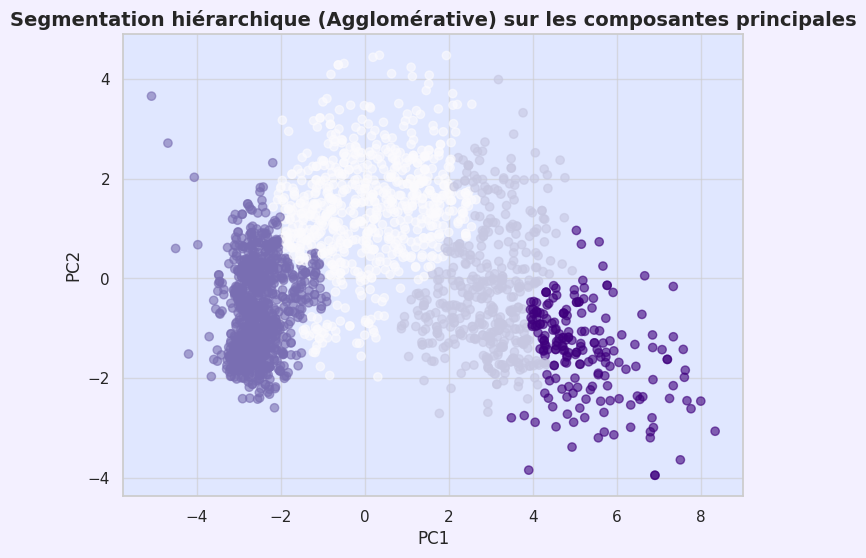

In [69]:
from sklearn.cluster import AgglomerativeClustering

agglo = AgglomerativeClustering(n_clusters=4)
df['Cluster_Agglo'] = agglo.fit_predict(scores[['PC1', 'PC2']])

plt.figure(figsize=(8,6))
plt.scatter(scores['PC1'], scores['PC2'], c=df['Cluster_Agglo'], cmap='Purples', alpha=0.6)
plt.title("Segmentation hiérarchique (Agglomérative) sur les composantes principales")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


In [71]:
# Ensure necessary columns exist in df
if 'Age' not in df.columns and 'Year_Birth' in df.columns:
    df['Age'] = 2025 - df['Year_Birth']

if 'TotalSpent' not in df.columns:
    # harmonize the original gold product column name
    gold_col = 'MntGoldProducts' if 'MntGoldProducts' in df.columns else ('MntGoldProds' if 'MntGoldProds' in df.columns else None)
    if gold_col:
        spend_cols = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts', gold_col]
        df['TotalSpent'] = df[spend_cols].sum(axis=1)

if 'TotalAcceptedCmp' not in df.columns:
    df['TotalAcceptedCmp'] = df[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']].sum(axis=1)

# Add Cluster_KMeans and Cluster_Agglo columns to df if they don't exist
# This assumes that the 'kmeans' and 'agglo' model objects are available
if 'Cluster_KMeans' not in df.columns and 'kmeans' in locals():
    df['Cluster_KMeans'] = kmeans.labels_

if 'Cluster_Agglo' not in df.columns and 'agglo' in locals():
    df['Cluster_Agglo'] = agglo.labels_

# Select the cluster column to use for the summary
cluster_col = 'Cluster_KMeans' # Default to KMeans
if cluster_col not in df.columns:
    cluster_col = 'Cluster_Agglo' # Try Agglo if KMeans is not found
    if cluster_col not in df.columns:
        # If neither is found, raise an error
        raise KeyError("Colonne de clusters introuvable (ex: 'Cluster_KMeans' ou 'Cluster_Agglo').")

print(f"Taille des clusters ({cluster_col}) :")
print(df[cluster_col].value_counts().sort_index())

summary_cols = [c for c in ['Age','Income','TotalSpent','TotalAcceptedCmp','TotalPurchases','CustomerSince']
                if c in df.columns]

cluster_summary = (
    df.groupby(cluster_col)[summary_cols]
      .mean()
      .round(1)
)

if 'Response' in df.columns:
    cluster_summary['Response_rate_%'] = (df.groupby(cluster_col)['Response'].mean() * 100).round(1)

print(f"\nRésumé des clusters ({cluster_col} - moyennes) :")
print(cluster_summary)

sizes = df[cluster_col].value_counts().sort_index().rename('Size')
cluster_summary = cluster_summary.join(sizes)
cluster_summary = cluster_summary[['Size'] + [c for c in cluster_summary.columns if c != 'Size']]
print(f"\nRésumé avec tailles ({cluster_col}) :")
print(cluster_summary)

Taille des clusters (Cluster_KMeans) :
Cluster_KMeans
0    978
1    341
2    420
3    501
Name: count, dtype: int64

Résumé des clusters (Cluster_KMeans - moyennes) :
                 Age   Income  TotalSpent  TotalAcceptedCmp  Response_rate_%
Cluster_KMeans                                                              
0               52.7  33960.3        89.5               0.1              9.2
1               54.6  80120.0      1569.5               1.1             41.3
2               59.6  69471.4      1092.7               0.3             12.1
3               61.3  54433.5       549.6               0.2             10.4

Résumé avec tailles (Cluster_KMeans) :
                Size   Age   Income  TotalSpent  TotalAcceptedCmp  \
Cluster_KMeans                                                      
0                978  52.7  33960.3        89.5               0.1   
1                341  54.6  80120.0      1569.5               1.1   
2                420  59.6  69471.4      1092.7        

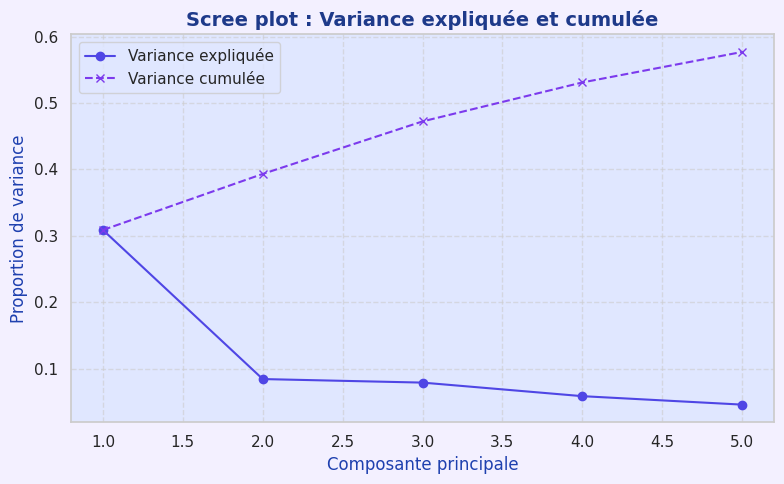

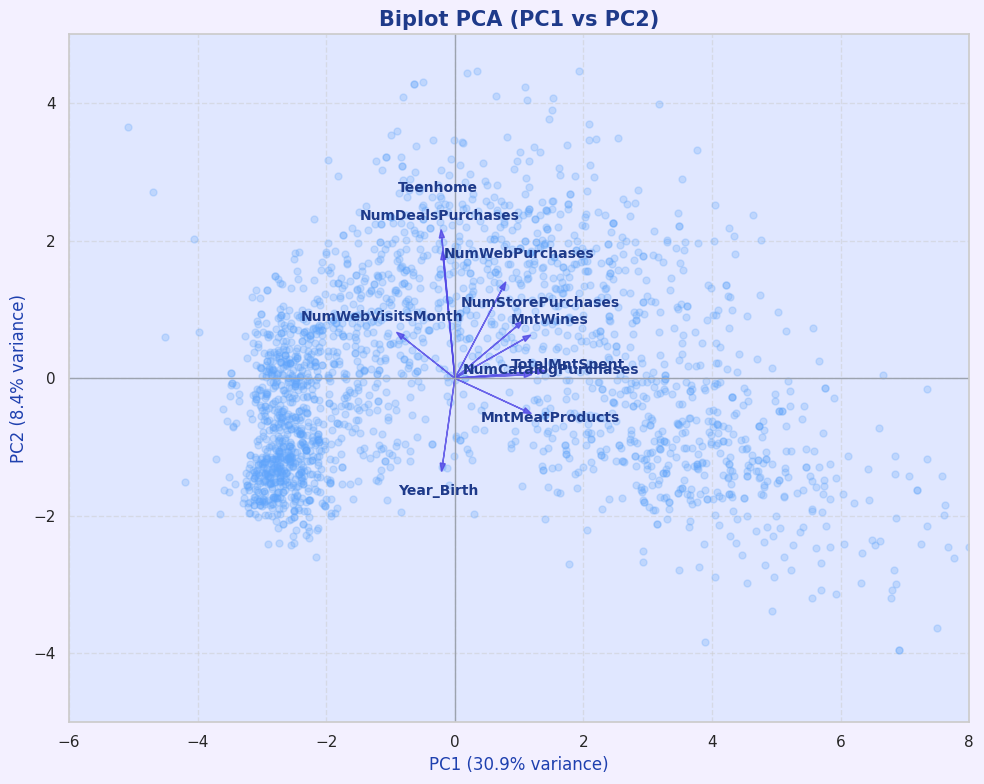

In [73]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained)+1), explained, marker="o", color="#4F46E5", label="Variance expliquée")
plt.plot(range(1, len(cumexp)+1), cumexp, marker="x", linestyle="--", color="#7C3AED", label="Variance cumulée")
plt.title("Scree plot : Variance expliquée et cumulée", fontsize=14, fontweight='bold', color='#1E3A8A')
plt.xlabel("Composante principale", fontsize=12, color='#1E40AF')
plt.ylabel("Proportion de variance", fontsize=12, color='#1E40AF')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

pcx, pcy = "PC1", "PC2"
plt.figure(figsize=(10, 8))

plt.scatter(scores[pcx], scores[pcy], alpha=0.25, s=25, color="#60A5FA")
plt.axhline(0, color="#9CA3AF", linewidth=1)
plt.axvline(0, color="#9CA3AF", linewidth=1)

loadings_df["norm"] = np.sqrt(loadings_df[pcx]**2 + loadings_df[pcy]**2)
top_vars = loadings_df.sort_values("norm", ascending=False).head(10)

scale = 4.0
for var, (lx, ly) in top_vars[[pcx, pcy]].iterrows():
    plt.arrow(0, 0, lx * scale, ly * scale, color="#4F46E5", alpha=0.8,
              head_width=0.08, length_includes_head=True)
    plt.text(lx * scale * 1.25, ly * scale * 1.25, var,
             fontsize=10, color="#1E3A8A", fontweight='bold', ha='center')

plt.title("Biplot PCA (PC1 vs PC2)", fontsize=15, fontweight='bold', color='#1E3A8A')
plt.xlabel(f"{pcx} ({explained[0]*100:.1f}% variance)", fontsize=12, color='#1E40AF')
plt.ylabel(f"{pcy} ({explained[1]*100:.1f}% variance)", fontsize=12, color='#1E40AF')

fig = plt.gcf()
ax = plt.gca()
fig.patch.set_facecolor('#F3F0FF')
ax.set_facecolor('#E0E7FF')
plt.grid(True, linestyle='--', alpha=0.5)

plt.xlim(-6, 8)
plt.ylim(-5, 5)
plt.tight_layout()
plt.show()

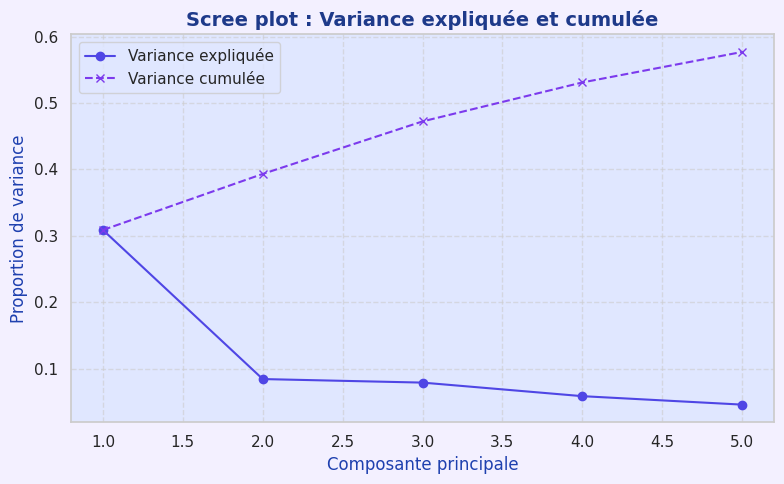

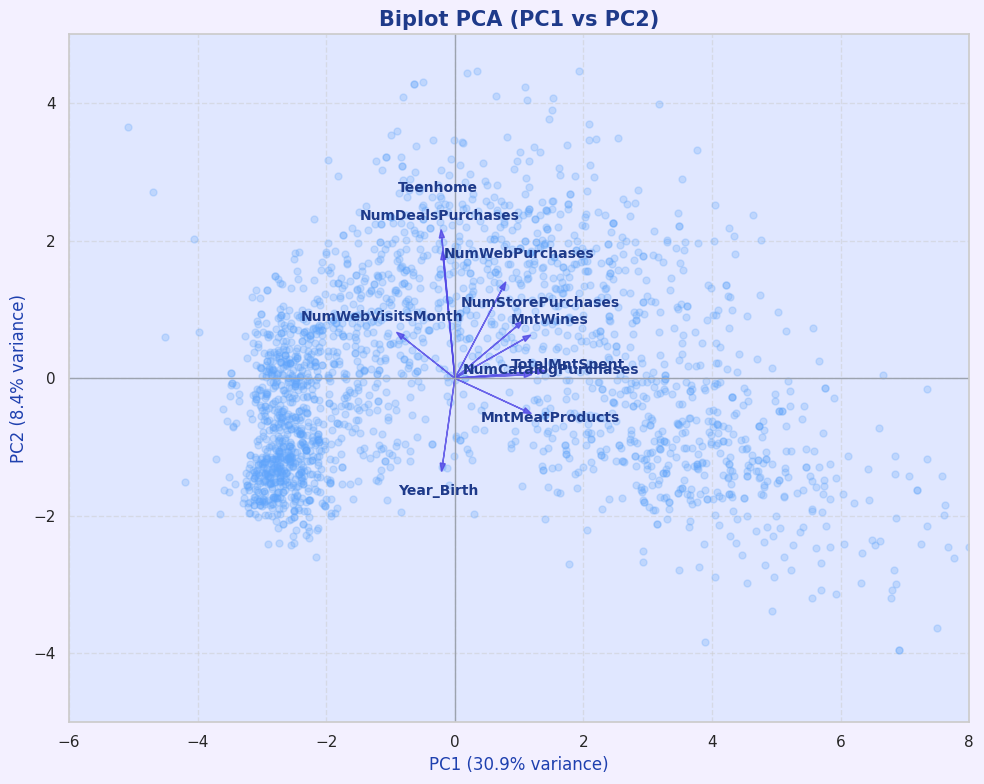

In [74]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained)+1), explained, marker="o", color="#4F46E5", label="Variance expliquée")
plt.plot(range(1, len(cumexp)+1), cumexp, marker="x", linestyle="--", color="#7C3AED", label="Variance cumulée")
plt.title("Scree plot : Variance expliquée et cumulée", fontsize=14, fontweight='bold', color='#1E3A8A')
plt.xlabel("Composante principale", fontsize=12, color='#1E40AF')
plt.ylabel("Proportion de variance", fontsize=12, color='#1E40AF')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

pcx, pcy = "PC1", "PC2"
plt.figure(figsize=(10, 8))

plt.scatter(scores[pcx], scores[pcy], alpha=0.25, s=25, color="#60A5FA")
plt.axhline(0, color="#9CA3AF", linewidth=1)
plt.axvline(0, color="#9CA3AF", linewidth=1)

loadings_df["norm"] = np.sqrt(loadings_df[pcx]**2 + loadings_df[pcy]**2)
top_vars = loadings_df.sort_values("norm", ascending=False).head(10)

scale = 4.0
for var, (lx, ly) in top_vars[[pcx, pcy]].iterrows():
    plt.arrow(0, 0, lx * scale, ly * scale, color="#4F46E5", alpha=0.8,
              head_width=0.08, length_includes_head=True)
    plt.text(lx * scale * 1.25, ly * scale * 1.25, var,
             fontsize=10, color="#1E3A8A", fontweight='bold', ha='center')

plt.title("Biplot PCA (PC1 vs PC2)", fontsize=15, fontweight='bold', color='#1E3A8A')
plt.xlabel(f"{pcx} ({explained[0]*100:.1f}% variance)", fontsize=12, color='#1E40AF')
plt.ylabel(f"{pcy} ({explained[1]*100:.1f}% variance)", fontsize=12, color='#1E40AF')

fig = plt.gcf()
ax = plt.gca()
fig.patch.set_facecolor('#F3F0FF')
ax.set_facecolor('#E0E7FF')
plt.grid(True, linestyle='--', alpha=0.5)

plt.xlim(-6, 8)
plt.ylim(-5, 5)
plt.tight_layout()
plt.show()




## Modélisation - Création modèle prédictif

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd
from sklearn.impute import SimpleImputer # Import SimpleImputer

# Prepare data for modeling
target = 'Response'
X = df.drop(columns=[target, 'ID', 'Dt_Customer'], errors='ignore')
y = df[target]

# Handle categorical features
X = pd.get_dummies(X, drop_first=True)

# Identify numerical columns for imputation
numerical_cols = X.select_dtypes(include=np.number).columns

# Impute missing values in numerical columns
imputer = SimpleImputer(strategy='mean')
X[numerical_cols] = imputer.fit_transform(X[numerical_cols])


# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Scale numerical features
# Note: Scaling should happen AFTER imputation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Comparaison de plusieurs modèles de classification

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC


# Dictionnaire des modèles à comparer
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "SVM (RBF)": SVC(kernel='rbf', probability=True, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    results.append({
        "Modèle": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Précision": precision_score(y_test, y_pred),
        "Rappel": recall_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred)
    })

# Tableau des résultats
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="F1-score", ascending=False).reset_index(drop=True)

# Affichage stylisé
display(results_df.style.background_gradient(cmap="Purples").format(subset=["Accuracy", "Précision", "Rappel", "F1-score"], formatter="{:.3f}"))

In [78]:
params_log = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear']
}

grid_log = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42),
                        params_log, cv=5, scoring='f1', n_jobs=-1)
grid_log.fit(X_train_scaled, y_train)

print("Meilleurs paramètres (LogReg) :", grid_log.best_params_)
best_log = grid_log.best_estimator_


Meilleurs paramètres (LogReg) : {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}


In [79]:


models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),

}

results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append([name, acc, prec, rec, f1])

results_df = pd.DataFrame(results, columns=["Modèle", "Accuracy", "Précision", "Rappel", "F1-score"])
print("Résultats du modèle:")
print(results_df)


Résultats du modèle:
                Modèle  Accuracy  Précision   Rappel  F1-score
0  Logistic Regression  0.883929     0.6875  0.39759  0.503817


In [80]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
target = 'Response'
X = df.drop(columns=[target, 'ID', 'Dt_Customer'], errors='ignore')
y = df[target]

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [83]:
#Amélioration du modèle de Régression Logistique
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer


imputer = SimpleImputer(strategy='mean')
X_train_scaled_imputed = imputer.fit_transform(X_train_scaled)


X_test_scaled_imputed = imputer.transform(X_test_scaled)


# Rééquilibrage des classes (SMOTE)
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train_scaled_imputed, y_train)

# Entraînement du modèle pondéré
log_model = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
log_model.fit(X_res, y_res)

# Probabilités prédictives using imputed test data
y_proba = log_model.predict_proba(X_test_scaled_imputed)[:, 1]

# Test de plusieurs seuils pour optimiser le rappel
thresholds = [0.3, 0.4, 0.5, 0.6]
results = []

for t in thresholds:
    y_pred = (y_proba >= t).astype(int)
    results.append({
        "Seuil": t,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Précision": precision_score(y_test, y_pred),
        "Rappel": recall_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred),
        "AUC": roc_auc_score(y_test, y_proba)
    })

results_df = pd.DataFrame(results)
display(results_df.style.background_gradient(cmap="Purples").format("{:.2f}"))

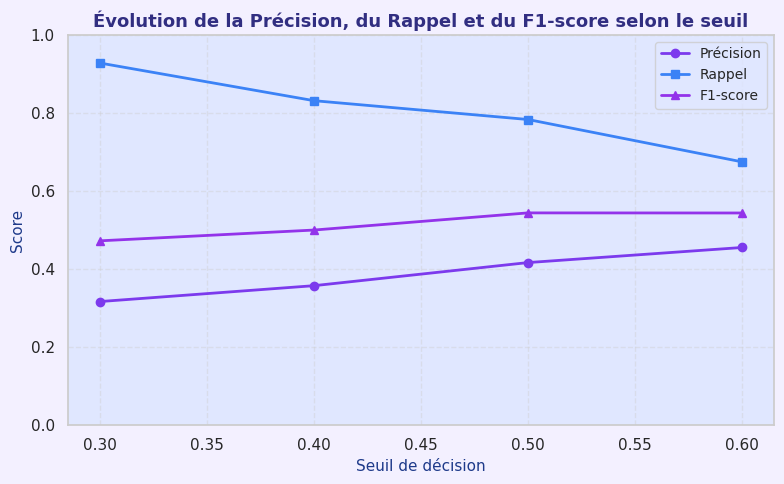

In [84]:

#Courbe Précision - Rappel selon le seuil
plt.figure(figsize=(8,5))

# Courbes flashy dans ton thème violet-bleu
plt.plot(results_df["Seuil"], results_df["Précision"],
         marker='o', color="#7C3AED", label="Précision", linewidth=2)
plt.plot(results_df["Seuil"], results_df["Rappel"],
         marker='s', color="#3B82F6", label="Rappel", linewidth=2)
plt.plot(results_df["Seuil"], results_df["F1-score"],
         marker='^', color="#9333EA", label="F1-score", linewidth=2)

plt.title("Évolution de la Précision, du Rappel et du F1-score selon le seuil",
          fontsize=13, fontweight='bold', color="#312E81")
plt.xlabel("Seuil de décision", fontsize=11, color="#1E3A8A")
plt.ylabel("Score", fontsize=11, color="#1E3A8A")
plt.grid(alpha=0.4, linestyle="--")
plt.legend(loc="best", fontsize=10)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


Matrice

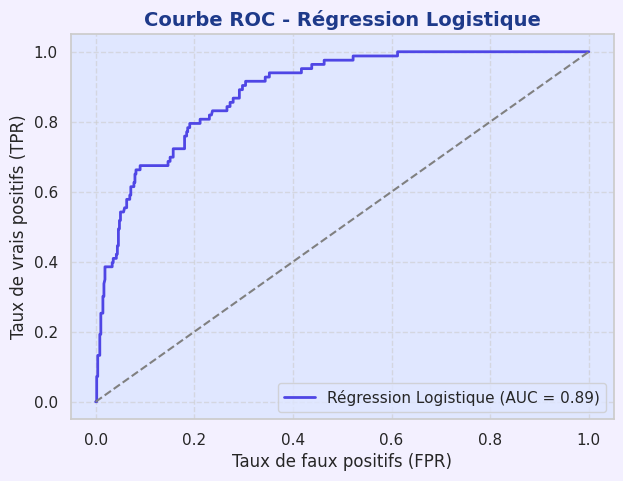

In [86]:
from sklearn.metrics import roc_curve, auc
from sklearn.impute import SimpleImputer


if np.isnan(X_test_scaled).any():
  try:
        X_test_scaled_imputed = imputer.transform(X_test_scaled)
    except NameError:
        print("Error: imputer object not found. Please ensure the imputation cell was run.")
        # As a fallback, fit a new imputer (less ideal as it should be fitted on training data)
        imputer_fallback = SimpleImputer(strategy='mean')
        X_test_scaled_imputed = imputer_fallback.fit_transform(X_test_scaled)
else:
    X_test_scaled_imputed = X_test_scaled

# Probabilities de prédiction using imputed test data
y_proba = log_model.predict_proba(X_test_scaled_imputed)[:, 1]

# Courbe ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, color="#4F46E5", lw=2, label=f"Régression Logistique (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], color="gray", linestyle="--")
plt.title("Courbe ROC - Régression Logistique", fontsize=14, fontweight='bold', color='#1E3A8A')
plt.xlabel("Taux de faux positifs (FPR)")
plt.ylabel("Taux de vrais positifs (TPR)")
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

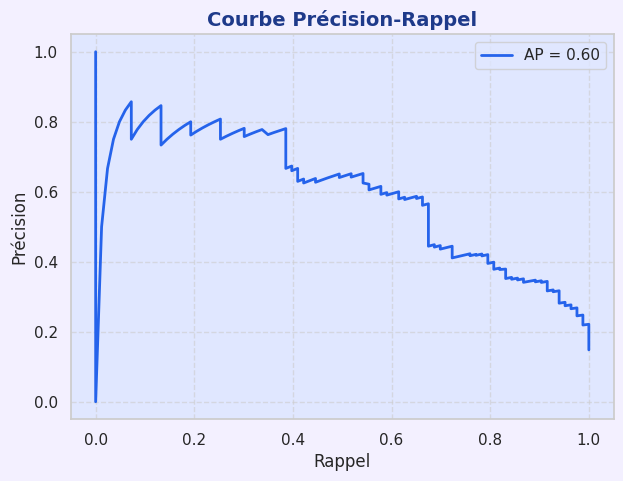

In [87]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_proba)
avg_prec = average_precision_score(y_test, y_proba)

plt.figure(figsize=(7,5))
plt.plot(recall, precision, color="#2563EB", lw=2, label=f"AP = {avg_prec:.2f}")
plt.title("Courbe Précision-Rappel", fontsize=14, fontweight='bold', color='#1E3A8A')
plt.xlabel("Rappel")
plt.ylabel("Précision")
plt.legend(loc="upper right")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


Using threshold of 0.5 for confusion matrix based on F1-score optimization.


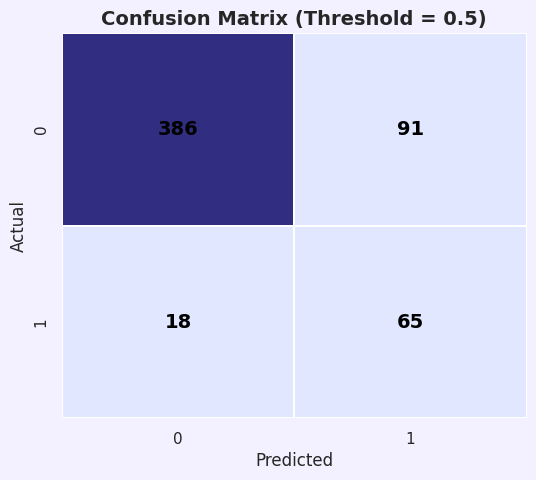

In [94]:
best_threshold = 0.5

# 1) Détermination du threshold
if 'results_df' in locals():
    best_threshold = results_df.loc[results_df['F1-score'].idxmax(), 'Seuil']
    print(f"Using threshold of {best_threshold} for confusion matrix based on F1-score optimization.")

elif 'y_proba' in locals():
    print("Using default threshold of 0.5 for confusion matrix as threshold analysis results are not available.")
    best_threshold = 0.5

else:
    print("Could not determine threshold. Attempting to calculate y_proba...")
    if 'X_test_scaled_imputed' in locals() and 'log_model' in locals():
        y_proba = log_model.predict_proba(X_test_scaled_imputed)[:, 1]
        print("Calculated y_proba using available model and test data.")
    else:
        print("Cannot calculate y_proba. Skipping confusion matrix plot.")
        pass  # ou return si dans une fonction

# 2) Si y_proba existe, calcul des prédictions et affichage de la matrice
if 'y_proba' in locals():
    y_pred_log = (y_proba >= best_threshold).astype(int)

    cm = confusion_matrix(y_test, y_pred_log)

    plt.figure(figsize=(6, 5))
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap=sns.color_palette(["#E0E7FF", "#6366F1", "#4F46E5", "#312E81"], as_cmap=True),
        cbar=False,
        linewidths=1.2,
        linecolor='white',
        annot_kws={"size": 14, "weight": "bold", "color": "black"}
    )
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix (Threshold = {best_threshold})")
    plt.show()
else:
    print("y_proba not available — confusion matrix not generated.")


/tmp/ipython-input-1401645331.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df, x="Importance", y="Variable", palette="Purples_r")


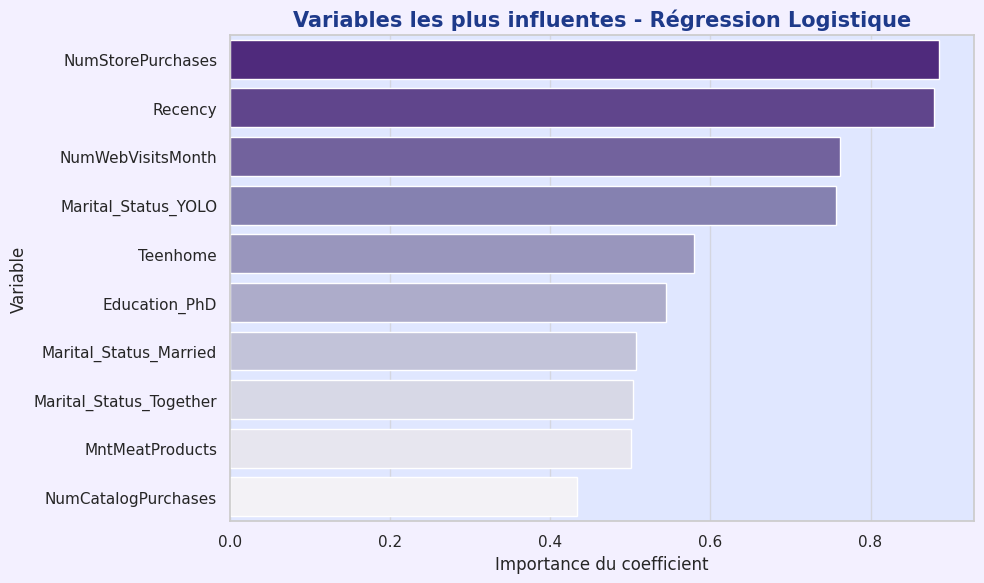

In [92]:


importance = abs(log_model.coef_[0])
features = X_train.columns

coef_df = pd.DataFrame({"Variable": features, "Importance": importance}).sort_values("Importance", ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=coef_df, x="Importance", y="Variable", palette="Purples_r")
plt.title("Variables les plus influentes - Régression Logistique", fontsize=15, fontweight='bold', color="#1E3A8A")
plt.xlabel("Importance du coefficient")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()
